# <font color="00ff00">  **Statistical Analysis for Accented Speech recognition**</font>
<font color=white> **evaluates the performance of an ASR model regarding accented speech**</font> 


# <font color="00ff00">  **Statistical Analysis for Accented Speech recognition**</font>
<font color=white> **evaluates the performance of an ASR model regarding accented speech**</font> 


## <font color="00ff00">  **Analyze results from Carlos’ model**</font>
<font color=white> **Using Gradient-based techniques:**</font> 

## <font color="00ff00">  **3- Gradient-based Analysis**</font>
<font color=white> **simple gradient-based explanation method considers the gradient of the output $f_j$ from a neural network (where j denotes a target class) with respect to an input $x_i$ (where i refers to the ith input time-step used to index the input sequence $x$):**</font> 

<font color=white>
$grad(j,i,x)={\displaystyle \frac{\partial f_j}{\partial x_i}}$</font>


 <font color="00ff00">  **3.1 Attribution Analysis**</font>


In [5]:
# ! pip install Nemo


In [6]:
# import nemo.collections.asr as nemo_asr
# asr_model = nemo_asr.models.EncDecRNNTBPEModel.from_pretrained(model_name="stt_de_conformer_transducer_large")

*********************************************************

In [7]:
!pip install hyphenate
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import os
import numpy as np
import pickle
import pandas as pd
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import display
from scipy.io import wavfile
from itertools import chain 
import string
import Levenshtein as Lev
from itertools import groupby
import scipy.stats as st
from scipy import signal
import nltk
from scipy.stats import wasserstein_distance as wd
from sklearn.metrics.pairwise import euclidean_distances as ed
from pyemd import emd
from hyphenate import hyphenate_word
from itertools import islice 
from collections import OrderedDict

###<font color="00ff00">  **Set up dataframe for transcripts and files:**</font>
<font color=white> **Set up dataframe for transcripts and files- Test_accent.txt file case:**</font> 

In [9]:
# Import the dataset file by method1 
# from google.colab import files
# uploaded = files.upload()



! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv

# copy the expermintations files to deal with them

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/*.* /content/

# copy the expermintations files from Mozilla Commen Voice v 10 to deal with them

In [10]:
#@title read in all three CSV files at once and store them in separate dataframes


# # my_data/all_overlap.txt ==>> test_at.txt
# # transcript ==>> text
# # file==>> audio_filepath
# # all_overlap ==>> dataset_trans_test_all_output.csv
# ###############################################

# df_at, df_gb, df_it, df_de_al, df_fr, df_de_ni, df_ch, df_de, df_us, df_ca, df_ru = pd.read_csv(['test_at.txt', 'test_gb.txt', 'test_it.txt', 'test_de_al.txt', 'test_fr.txt',
#                                'test_de_ni.txt', 'test_ch.txt', 'test_de.txt', 'test_us.txt', 'test_ca.txt', 'test_ru.txt'] )

df_at= pd.read_csv('test_at.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_gb= pd.read_csv('test_gb.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_it= pd.read_csv( 'test_it.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_de_al= pd.read_csv('test_de_al.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_fr= pd.read_csv('test_fr.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_de_ni= pd.read_csv( 'test_de_ni.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_ch= pd.read_csv('test_ch.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_de= pd.read_csv('test_de.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_us= pd.read_csv( 'test_us.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_ca= pd.read_csv('test_ca.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
df_ru= pd.read_csv('test_ru.txt',delimiter = ", ", header = None ,encoding="utf-8", names=['audio_filepath','transcript','duration'],engine='python' )
 
# combine the dataframes into a single one 
combined_df = pd.concat([df_at, df_gb, df_it, df_de_al, df_fr, df_de_ni, df_ch, df_de, df_us, df_ca, df_ru], ignore_index=True)

dataset_trans=combined_df

dataset_trans['audio_filepath'] = dataset_trans['audio_filepath'].map(lambda x: x.split('.',6)[2])
dataset_trans['audio_filepath'] = dataset_trans['audio_filepath'].map(lambda x: x.split('/',6)[3])
dataset_trans['transcript'] = dataset_trans['transcript'].map(lambda x: x.split('": "',2)[1])
dataset_trans['transcript'] = dataset_trans['transcript'].map(lambda x: x.split('"',2)[0])
dataset_trans['duration'] = dataset_trans['duration'].map(lambda x: x.split('": ',2)[1])
dataset_trans['duration'] = dataset_trans['duration'].map(lambda x: x.split('}',2)[0])
    

print(type(dataset_trans),'\n',dataset_trans.head(10))

print(len(dataset_trans))
# the complete final dataframe of all Accents txt files
dataset_trans.to_csv( 'dataset_trans_test_all_output.csv')

<class 'pandas.core.frame.DataFrame'> 
              audio_filepath  \
0  common_voice_de_31449916   
1  common_voice_de_19730674   
2  common_voice_de_19703888   
3  common_voice_de_18507972   
4  common_voice_de_24131267   
5  common_voice_de_21905399   
6  common_voice_de_20143462   
7  common_voice_de_21889444   
8  common_voice_de_18192538   
9  common_voice_de_19615389   

                                          transcript duration  
0  er ist nach eustache de saint pierre der bekan...      4.9  
1  eine erste kleinformatige vorstudie in bleisti...     10.1  
2  er blieb ohne erfolg und lag in ständigem stre...      9.0  
3      mein garten ist teil eines kleingartenvereins      3.7  
4      was habe ich damals für einen unsinn geträumt      3.6  
5  der erste punkt bezieht sich auf die angst vor...      5.2  
6  anschließend war er bei der regierung in düsse...      4.1  
7  jede quersubventionierung soll in zukunft unzu...     10.4  
8  silke und marco verkrümelten sich unauf

In [13]:
# my_data/common-final-file-info.json==>> results-AOE.json
with open('results-AOE.json', 'r', encoding="utf-8") as j:
	file_meta = json.load(j)

In [14]:
file_meta.keys()

dict_keys(['test_at.txt', 'test_gb.txt', 'test_it.txt', 'test_de_al.txt', 'test_fr.txt', 'test_de_ni.txt', 'test_ch.txt', 'test_de.txt', 'test_us.txt', 'test_ca.txt', 'test_ru.txt'])

In [15]:
dataset_trans['transcript']

0        er ist nach eustache de saint pierre der bekan...
1        eine erste kleinformatige vorstudie in bleisti...
2        er blieb ohne erfolg und lag in ständigem stre...
3            mein garten ist teil eines kleingartenvereins
4            was habe ich damals für einen unsinn geträumt
                               ...                        
49225                           sie kramte in ihrer tasche
49226              libreville ist die hauptstadt von gabun
49227    das ramponierte image haben sie sich selbst zu...
49228               er macht einen unterforderten eindruck
49229    mit der kippe sind sie für ihr kind gefährlich...
Name: transcript, Length: 49230, dtype: object

In [16]:
transcripts = list(set(dataset_trans['transcript'].tolist()))
len(transcripts)

39087

In [17]:
type(transcripts)

list

In [18]:
trans_dict = {x:[] for x in transcripts}

In [19]:
trans_dict

{'hermann wendland schrieb eine reihe botanischer schriften insbesondere über palmen sowie': [],
 'ein trainingsplatz war in unmittelbarer nähe neu gebaut worden': [],
 'in den folgenden jahren baute er die organisation im ruhrgebiet weiter aus': [],
 'es werden vorwiegend die stärkehaltigen knollen genutzt': [],
 'die bevorstehende erweiterung ist äußerst wichtig': [],
 'er verwendet auch die leinwandnamen cirio santiago und leonard hermes': [],
 'ist das politisch und psychologisch korrekt': [],
 'die band existierte nur für das album': [],
 'an welcher autobahnabfahrt muss ich die autobahn verlassen wenn ich nach badenbaden möchte': [],
 'dies war ein wendepunkt für jexblake sie beschloss ärztin zu werden': [],
 'ich halte das für unanständig': [],
 'die bauruine entwickelte sich zum wahrzeichen der stadt': [],
 'ferner beginnt die bocholter kirmes traditionell mit happy hours': [],
 'ihnen wird empfohlen eine pause einzulegen': [],
 'ernst von salomon entstammte der adelsfamilie vo

In [20]:
len(trans_dict)

39087

In [21]:
# Assign the row['transcript'] value to the 
for index, row in dataset_trans.iterrows():
    trans_dict[row['transcript']].append(row['audio_filepath'])

In [22]:
trans_dict['als zweiter teil einer geplanten tetralogie wurde es ins deutsche übersetzt']

['common_voice_de_20411523']

In [23]:
######################## show the first 5 rows of the dictionary trans_dict ##################################
from itertools import islice

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

n_items = take(5, trans_dict.items())
n_items 


[('hermann wendland schrieb eine reihe botanischer schriften insbesondere über palmen sowie',
  ['common_voice_de_19253392']),
 ('ein trainingsplatz war in unmittelbarer nähe neu gebaut worden',
  ['common_voice_de_22982455']),
 ('in den folgenden jahren baute er die organisation im ruhrgebiet weiter aus',
  ['common_voice_de_23358048']),
 ('es werden vorwiegend die stärkehaltigen knollen genutzt',
  ['common_voice_de_22380567']),
 ('die bevorstehende erweiterung ist äußerst wichtig',
  ['common_voice_de_22459274'])]

In [24]:
type(file_meta)


dict

In [25]:
##### find the Audio file name
trans_dict['findest du dich allein in braunschweig zurecht']

['common_voice_de_17686048', 'common_voice_de_17650552']

In [28]:
##### find the Audio file name
trans_dict['schreib ihr halt ein paar liebe worte rein']


['common_voice_de_18946081', 'common_voice_de_18568843']

###<font color="00ff00">  **Set up dataframe for transcripts and files:**</font>
<font color=white> **Set up dataframe for transcripts and files- Results.json file case:**</font> 
 

In [29]:
#@title store the contents of Accented files in an extra text files respekt Ä Ö Ü ß
################################## store the contents of Accented files in an extra text files respekt Ä Ö Ü ß ##################################### 
####################################################################################################################################################
import json
if __name__ == "__main__":
  results = json.load(open('results.json'),encoding="utf-8")
  # Required_text=input("inser thte sentence: ")
  for test_file in results:
    list_values = [v["reference"] for v in results[test_file].values()]
    # string(ref_lens)
    # print(f'{test_file} \n',ref_lens)
    str_values = ', '.join(str(x) for x in list_values)
    
    # print(df_trans.head(10))

    # len(df_trans)

    import os
    # remove the script if exists 
    # os.remove("dataset_accent.py")
    # open script to write in the calculation of Mean of all accent
    dataset_accent_write_file = open(f'dataset_{test_file}.py','w')
    dataset_accent_write_file.write(str_values)
    dataset_accent_write_file.close()
    ! cp /content/*.txt.py /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_data/

In [30]:
#@title Creat Dictionary "trans_dict_results" of all Accent Audio files number and their Values

########################################################################################################################################################
############################# Creat Dictionary "trans_dict_results" of all Accent Audio files number and their Values###################################
########################################################################################################################################################


trans_dict_results = {'Keys_MMM_2050': '1000'}

if __name__ == "__main__":
  Dict_results = json.load(open('results.json'))
  for test_file in Dict_results:
    list_test_accent_txt_values = [v["reference"] for v in Dict_results[test_file].values()]
    # print('*********\n',list_test_accent_txt_values)
    # list_test_accent_txt_keys=[k.split('.',6)[2] for k in Dict_results[test_file].keys()]
    list_test_accent_txt_keys=[re.split(r'[.|/]',k)[9] for k in Dict_results[test_file].keys()]

    trans_dict_test_file_result = dict(zip(list_test_accent_txt_keys, list_test_accent_txt_values))
    trans_dict_results.update(trans_dict_test_file_result)
    
######################################## write the dictionary "trans_dict" to a json file ###############################
with open("trans_dict_results.json","w", encoding='utf-8') as jsonfile:  
  json.dump(trans_dict_results,jsonfile,ensure_ascii=False)
! cp /content/trans_dict_results.json /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_data/


In [31]:
#@title Default title text
### Show the first 10 elements of the dict
n_items = take(5, trans_dict_results.items())
n_items 

[('Keys_MMM_2050', '1000'),
 ('common_voice_de_31449916',
  'er ist nach eustache de saint pierre der bekannteste der gruppe'),
 ('common_voice_de_19730674',
  'eine erste kleinformatige vorstudie in bleistift findet sich in einem von kellers skizzenbüchern'),
 ('common_voice_de_19703888',
  'er blieb ohne erfolg und lag in ständigem streit mit den österreichischen generälen'),
 ('common_voice_de_18507972', 'mein garten ist teil eines kleingartenvereins')]

### <font color=white> **Display the Audio files number(Dict Key) of a given Utterance (Dict Value) and vice versa:**</font> 

In [32]:
trans_dict_results['common_voice_de_17686048']

'findest du dich allein in braunschweig zurecht'

In [43]:
# # find if there are repeatation of a utterance in all German Accents
# dataset_test_ca=pd.read_csv("dataset_test_ca.txt.py", encoding="Utf-8")
# for i in dataset_test_ca:
#   keys = [k for k, v in trans_dict_results.items() if v == i]
#   if keys != []:
#     print(keys)

In [55]:
# # find the repeatation of a sentence in all German Accents
# dataset_test_ch=pd.read_csv("dataset_test_ch.txt.py",sep=',' ,encoding="Utf-8")
# for i in dataset_test_ch:
#   keys = [k for k, v in trans_dict_results.items() if v == i]
#   if keys != []:
#     print(keys)

In [56]:
# # find all the Audio files for a sentence
# dataset_test_ch=pd.read_csv("dataset_test_ch.txt.py", encoding="Utf-8")
# list_test_ch=[]
# for i in dataset_test_ch:
#   print((i))
#   # list_test_ca.append

### <font color="00ff00">  **Display the Audio files number(Dict Key) of a given Word (Dict Value):**</font>
<font color=white> **We selected the fllowing 8 Words rather than 8 Utterances, due no enough Utterances in all Accents:**</font> 

<font color=white>

1. höchsten 
2. völlig 
3. südlichen
4. gefährlich
5. hauptsächlich
6. später
7. geschäftsordnung
8. präsidentschaft 
</font> 


### <font color=white> ****</font> 

In [ ]:
# ###############################################################
# #### show the Audio files for a given Word ####################
# for key, value in trans_dict_results.items():
#       if "höchsten" in value:
#         print(key)
#         Audio_file_key=key

In [52]:
#@title ###**According to a given utterance, this code shows and writes in which Audio files and which Accent this given utterance is located:**

###########################################################################################################################################################
########### creat a Dataframe called "dataset_audiofilename_transcript_accent" contains all audiofilename and thier 'transcript' and 'test_file' /Accent####
###########################################################################################################################################################
list_dataset_test_=['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']
list_dataset_test_accent=['Österreichisches Deutsch','Britisches Deutsch','Italienisch Deutsch','Alemannische Färbung,Schweizer Standart Deutsch',
'Französisch Deutsch','Niederländisch Deutsch','Schweizerdeutsch','Deutschland Deutsch','Amerikanisches Deutsch','Kanadisches Deutsch','Russisch Deutsch']

data_dict_accent_duration  = dict(zip( list_dataset_test_, list_dataset_test_accent))  


### here is the required_utterance
required_utterance="findest du dich allein in braunschweig zurecht"
newfile=0
# dict_audiofilename_transcript_accent=[]
# To find out the Audio file's Accent
list_test_accent_txt_values=[]
list_test_accent_txt_keys=[]
list_test_file=[]
list_accent_long=[]

if __name__ == "__main__":
  Dict_results = json.load(open('results.json'))
  for test_file in Dict_results:
    # print(test_file)
    list_test_accent_txt_values_temp = [v["reference"] for v in Dict_results[test_file].values()]
    list_test_accent_txt_keys_temp=[re.split(r'[.|/]',k)[9] for k in Dict_results[test_file].keys()]
    list_test_file_temp=[test_file for v in Dict_results[test_file].values()]

# creat a Dataframe called  dataset_audiofilename_transcript_accent contains all audiofilename and thier 'transcript' and 'test_file' /Accent
    list_test_accent_txt_values.extend(list_test_accent_txt_values_temp)
    list_test_accent_txt_keys.extend(list_test_accent_txt_keys_temp)
    list_test_file.extend(list_test_file_temp)
    keys=['audiofilename','transcript','test_file']
    trans_dict_test_file_result = dict(zip(keys,[list_test_accent_txt_keys, list_test_accent_txt_values,list_test_file]))
    
dataset_audiofilename_transcript_accent = pd.DataFrame(trans_dict_test_file_result)

#############################################################################################
##### Show and write which Audio files and which Accent the given word is located ###########

for key, value in dataset_audiofilename_transcript_accent['transcript'].items():
  if required_utterance in value:

# to show the full name accent of the founded result 
    for keys_accent_long_i, values_accent_long_i in data_dict_accent_duration.items():
      if dataset_audiofilename_transcript_accent.test_file[key]==keys_accent_long_i:
        print()
        # print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
        # f'*** Accent ={dataset_audiofilename_transcript_accent.test_file[key]}')
        print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
              f'*** Accent is {data_dict_accent_duration[keys_accent_long_i]}')


        # # Alternative way (for speed performance) to export the Audio files numbers and thiers Acccent to an external file
        # # os.mkdir('/content/audiofilenames_transcript')

        # if newfile==0:
        #   dataset_accent_write_file = open(f'audiofilenames_transcript_accent_of_an_utterance.txt','w')
        #   newfile=1
        # else:
        #   dataset_accent_write_file = open(f'audiofilenames_transcript_accent_of_an_utterance.txt','a')
        #   dataset_accent_write_file.write(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
        #       f'*** Accent is {data_dict_accent_duration[keys_accent_long_i]}\n')
        #   dataset_accent_write_file.close()
        #   # ! cp /content/audiofilenames_transcript/*.txt /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_data/audiofilenames_transcript/


common_voice_de_17686048 findest du dich allein in braunschweig zurecht *** Accent is Schweizerdeutsch

common_voice_de_17650552 findest du dich allein in braunschweig zurecht *** Accent is Deutschland Deutsch


In [53]:
#@title ###**According to a given word, this code shows and writes in which Audio files and which Accent this given word is located:**

###########################################################################################################################################################
########### creat a Dataframe called "dataset_audiofilename_transcript_accent" contains all audiofilename and thier 'transcript' and 'test_file' /Accent####
###########################################################################################################################################################
list_dataset_test_=['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']
list_dataset_test_accent=['Österreichisches Deutsch','Britisches Deutsch','Italienisch Deutsch','Alemannische Färbung,Schweizer Standart Deutsch',
'Französisch Deutsch','Niederländisch Deutsch','Schweizerdeutsch','Deutschland Deutsch','Amerikanisches Deutsch','Kanadisches Deutsch','Russisch Deutsch']

data_dict_accent_duration  = dict(zip( list_dataset_test_, list_dataset_test_accent))  


### here is the required_word
required_word="höchsten"
newfile=0
# dict_audiofilename_transcript_accent=[]
# To find out the Audio file's Accent
list_test_accent_txt_values=[]
list_test_accent_txt_keys=[]
list_test_file=[]
list_accent_long=[]

if __name__ == "__main__":
  Dict_results = json.load(open('results.json'))
  for test_file in Dict_results:
    # print(test_file)
    list_test_accent_txt_values_temp = [v["reference"] for v in Dict_results[test_file].values()]
    list_test_accent_txt_keys_temp=[re.split(r'[.|/]',k)[9] for k in Dict_results[test_file].keys()]
    list_test_file_temp=[test_file for v in Dict_results[test_file].values()]

# creat a Dataframe called  dataset_audiofilename_transcript_accent contains all audiofilename and thier 'transcript' and 'test_file' /Accent
    list_test_accent_txt_values.extend(list_test_accent_txt_values_temp)
    list_test_accent_txt_keys.extend(list_test_accent_txt_keys_temp)
    list_test_file.extend(list_test_file_temp)
    keys=['audiofilename','transcript','test_file']
    trans_dict_test_file_result = dict(zip(keys,[list_test_accent_txt_keys, list_test_accent_txt_values,list_test_file]))
    
dataset_audiofilename_transcript_accent = pd.DataFrame(trans_dict_test_file_result)

#############################################################################################
##### Show and write which Audio files and which Accent the given word is located ###########

for key, value in dataset_audiofilename_transcript_accent['transcript'].items():
  if required_word in value:

# to show the full name accent of the founded result 
    for keys_accent_long_i, values_accent_long_i in data_dict_accent_duration.items():
      if dataset_audiofilename_transcript_accent.test_file[key]==keys_accent_long_i:
        print()
        # print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
        # f'*** Accent ={dataset_audiofilename_transcript_accent.test_file[key]}')
        print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
              f'*** Accent is {data_dict_accent_duration[keys_accent_long_i]}')
 

          ## Alternative way (for speed performance) to export the Audio files numbers and thiers Acccent to an external file
        if newfile==0:
          dataset_accent_write_file = open(f'Audiofilesnumber_Accent.txt','w')
          newfile=1
        else:
          dataset_accent_write_file = open(f'Audiofilesnumber_Accent_{required_word}.txt','a')
          # dataset_accent_write_file.write(f'{key}the Audio file\'s Accent file is {test_file}\n')
          dataset_accent_write_file.write(f' {dataset_audiofilename_transcript_accent.audiofilename[key]} ***{dataset_audiofilename_transcript_accent.transcript[key]} *** Accent is {data_dict_accent_duration[keys_accent_long_i]}')


          dataset_accent_write_file.close()
          ! cp /content/Audiofilesnumber_Accent*.txt /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_data/


common_voice_de_18120851 dafür kann ich höchstens noch den schrottpreis bezahlen *** Accent is Österreichisches Deutsch

common_voice_de_21905077 die kostengünstigste strategie mit den höchsten erfolgsaussichten ist eben die vorsorgeuntersuchung *** Accent is Österreichisches Deutsch

common_voice_de_25119456 arriach ist damit die gemeinde kärntens mit dem zweithöchsten anteil an evangelischen gläubigen *** Accent is Österreichisches Deutsch

common_voice_de_18199949 das strategiepapier zum handelskrieg unterliegt der höchsten geheimhaltungsstufe *** Accent is Österreichisches Deutsch

common_voice_de_17821711 energie wird niemals verbraucht höchstens umgewandelt *** Accent is Österreichisches Deutsch

common_voice_de_17874440 energie wird niemals verbraucht höchstens umgewandelt *** Accent is Österreichisches Deutsch

common_voice_de_24115764 auf dieser ebene sollen hochleistungsrechner der höchsten leistungsklasse angesiedelt sein *** Accent is Österreichisches Deutsch

common_voice

In [ ]:
for key, value in trans_dict_test_file_result.items():
    print(key, value)

In [49]:
import pandas as pd

#@title ###**According to a given word, this code shows and writes in which Audio files and which Accent this given word is located:**

###########################################################################################################################################################
########### creat a Dataframe called "dataset_audiofilename_transcript_accent" contains all audiofilename and thier 'transcript' and 'test_file' /Accent####
###########################################################################################################################################################
list_dataset_test_=['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']
list_dataset_test_accent=['Österreichisches Deutsch','Britisches Deutsch','Italienisch Deutsch','Alemannische Färbung,Schweizer Standart Deutsch',
'Französisch Deutsch','Niederländisch Deutsch','Schweizerdeutsch','Deutschland Deutsch','Amerikanisches Deutsch','Kanadisches Deutsch','Russisch Deutsch']

data_dict_accent_duration  = dict(zip( list_dataset_test_, list_dataset_test_accent))  

# create an empty set to store the words that meet all 11 accents
words = set()
accent_long_set=set()
accent_long_list=[]
 

### here is the required_word
# required_word="Start"
required_word=input('Insert a word to test it please? ')
newfile=0

# dict_audiofilename_transcript_accent=[]
# To find out the Audio file's Accent
list_test_accent_txt_values=[]
list_test_accent_txt_keys=[]
list_test_file=[]
list_accent_long=[]

if __name__ == "__main__":
  Dict_results = json.load(open('results.json'))
  for test_file in Dict_results:
    # print(test_file)
    list_test_accent_txt_values_temp = [v["reference"] for v in Dict_results[test_file].values()]
    list_test_accent_txt_keys_temp=[re.split(r'[.|/]',k)[9] for k in Dict_results[test_file].keys()]
    list_test_file_temp=[test_file for v in Dict_results[test_file].values()]

# creat a Dataframe called  dataset_audiofilename_transcript_accent contains all audiofilename and thier 'transcript' and 'test_file' /Accent
    list_test_accent_txt_values.extend(list_test_accent_txt_values_temp)
    list_test_accent_txt_keys.extend(list_test_accent_txt_keys_temp)
    list_test_file.extend(list_test_file_temp)
    keys=['audiofilename','transcript','test_file']
    trans_dict_test_file_result = dict(zip(keys,[list_test_accent_txt_keys, list_test_accent_txt_values,list_test_file]))
    
dataset_audiofilename_transcript_accent = pd.DataFrame(trans_dict_test_file_result)
 

for key, row in dataset_audiofilename_transcript_accent.iterrows():
  if required_word in row['transcript']:

# to show the full name accent of the founded result 
    for keys_accent_long_i, values_accent_long_i in data_dict_accent_duration.items():
      if dataset_audiofilename_transcript_accent.test_file[key]==keys_accent_long_i:
        # print()
        # print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
        # f'*** Accent ={dataset_audiofilename_transcript_accent.test_file[key]}')
        # print(dataset_audiofilename_transcript_accent.audiofilename[key],dataset_audiofilename_transcript_accent.transcript[key],
        #       f'*** Accent is {data_dict_accent_duration[keys_accent_long_i]}')
        accent_long_list.append(data_dict_accent_duration[keys_accent_long_i])
        accent_long_str = ', '.join(accent_long_list)
        accent_long_set=set(accent_long_str.split(', '))
        # print(accent_long_str)

        # get the accents for the current row
        # accents = set(row['test_file'].split())
        # accents = set(accent_long_set.split())
        # print(len(accents))
        # print('*'*60)
        # check if the set of accents contains all 11 accents

if len(accent_long_set) == 11:
  print('*'*60)
  print(f'Perfect, the Word {required_word} are found in all German accents')
  print('*'*60)
else:
  print(f'unfortunately, the Word "{required_word}" are ***NOT*** found in all German accents')
        # add the word to the set of words that meet all 11 accents
#             words.add(row['transcript'])

# # # print the words that meet all 11 accents
# print('*'*60)
# print(words)


Insert a word to test it please? hallo
unfortunately, the Word "hallo" are ***NOT*** found in all German accents


In [50]:
dataset_audiofilename_transcript_accent

,audiofilename,transcript,test_file
0,common_voice_de_31449916,er ist nach eustache de saint pierre der bekan...,test_at.txt
1,common_voice_de_19730674,eine erste kleinformatige vorstudie in bleisti...,test_at.txt
2,common_voice_de_19703888,er blieb ohne erfolg und lag in ständigem stre...,test_at.txt
3,common_voice_de_18507972,mein garten ist teil eines kleingartenvereins,test_at.txt
4,common_voice_de_24131267,was habe ich damals für einen unsinn geträumt,test_at.txt
...,...,...,...
49225,common_voice_de_17645865,sie kramte in ihrer tasche,test_ru.txt
49226,common_voice_de_17645866,libreville ist die hauptstadt von gabun,test_ru.txt
49227,common_voice_de_18862913,das ramponierte image haben sie sich selbst zu...,test_ru.txt
49228,common_voice_de_18862914,er macht einen unterforderten eindruck,test_ru.txt


###<font color="00ff00">  **To count the number of occurrences of each word over the sentences located in the transcripts column of a data frame:**</font>
<font color=white> **the following steps are achieve that**</font> 

In [59]:
import pandas as pd
# First, import the required libraries. You will need the pandas library to work with data frames and the nltk library to tokenize the sentences and words in the transcripts column.
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')


#@title ###**To count the number of occurrences of each word over the sentences located in the transcripts column of a data frame:**

###########################################################################################################################################################
########### creat a Dataframe called "dataset_audiofilename_transcript_accent" contains all audiofilename and thier 'transcript' and 'test_file' /Accent####
###########################################################################################################################################################
list_dataset_test_=['test_at.txt','test_gb.txt','test_it.txt','test_de_al.txt','test_fr.txt','test_de_ni.txt','test_ch.txt',
               'test_de.txt','test_us.txt','test_ca.txt','test_ru.txt']
list_dataset_test_accent=['Österreichisches Deutsch','Britisches Deutsch','Italienisch Deutsch','Alemannische Färbung,Schweizer Standart Deutsch',
'Französisch Deutsch','Niederländisch Deutsch','Schweizerdeutsch','Deutschland Deutsch','Amerikanisches Deutsch','Kanadisches Deutsch','Russisch Deutsch']

data_dict_accent_duration  = dict(zip( list_dataset_test_, list_dataset_test_accent))  

# create an empty set to store the words that meet all 11 accents


accent_long_list=[]
 

### here is the required_word
# required_word="Start"
# required_word=input('Insert a word to test it please? ')
newfile=0


# dict_audiofilename_transcript_accent=[]
# To find out the Audio file's Accent
list_test_accent_txt_values=[]
list_test_accent_txt_keys=[]
list_test_file=[]
list_accent_long=[]

if __name__ == "__main__":
  Dict_results = json.load(open('results.json'))
  for test_file in Dict_results:
    # print(test_file)
    list_test_accent_txt_values_temp = [v["reference"] for v in Dict_results[test_file].values()]
    list_test_accent_txt_keys_temp=[re.split(r'[.|/]',k)[9] for k in Dict_results[test_file].keys()]
    list_test_file_temp=[test_file for v in Dict_results[test_file].values()]

# creat a Dataframe called  dataset_audiofilename_transcript_accent contains all audiofilename and thier 'transcript' and 'test_file' /Accent
    list_test_accent_txt_values.extend(list_test_accent_txt_values_temp)
    list_test_accent_txt_keys.extend(list_test_accent_txt_keys_temp)
    list_test_file.extend(list_test_file_temp)
    keys=['audiofilename','transcript','test_file']
    trans_dict_test_file_result = dict(zip(keys,[list_test_accent_txt_keys, list_test_accent_txt_values,list_test_file]))
    
dataset_audiofilename_transcript_accent = pd.DataFrame(trans_dict_test_file_result)
 
# Tokenize the sentences in the transcripts column using the sent_tokenize function from the nltk library. This will create a list of sentences.
sentences = dataset_audiofilename_transcript_accent['transcript'].apply(sent_tokenize)

# Tokenize the words in each sentence using the word_tokenize function from the nltk library. This will create a list of words for each sentence.
words = sentences.apply(lambda x: [word_tokenize(sentence) for sentence in x])

# Flatten the list of words so that you have a single list of all words in the transcripts column.
all_words = [word for sentence in words for word_list in sentence for word in word_list]

# Use the Counter function from the collections library to count the occurrences of each word.
from collections import Counter
word_counts = Counter(all_words)

# Convert the word_counts object to a data frame using the pd.DataFrame function.
word_counts_dataset_audiofilename_transcript_accent = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# Sort the data frame by the count column in descending order.
word_counts_dataset_audiofilename_transcript_accent = word_counts_dataset_audiofilename_transcript_accent.sort_values('count', ascending=False)

print('Count the number of occurrences of each word over the sentences located in the transcripts column of a data frame:')
print(word_counts_dataset_audiofilename_transcript_accent)
word_counts_dataset_audiofilename_transcript_accent.to_csv('number_of_occurrences_of_each_word.csv', index=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Count the number of occurrences of each word over the sentences located in the transcripts column of a data frame:
               count
die            14029
der            13302
ist             7629
und             7554
in              7195
...              ...
kunstdünger        1
hovan              1
rocky              1
inbesitznahme      1
kippe              1

[54083 rows x 1 columns]


###<font color="00ff00">  **Normalize Attributions**</font>
<font color=white> **Normalize Attributions**</font> 

In [38]:
import pandas as pd
tsv_data = pd.read_csv('validated.tsv', sep='\t')
tsv_data.drop(tsv_data[(tsv_data['accents'].isna())].index, inplace=True)
tsv_data
print('*******************print Labels************************')

for label, content in tsv_data.items():
    print(f'label: {label}')
    #print(f'content: {content}', sep='\n')

print('*********************print Contents**********************')

for label, content in tsv_data.items():
    #print(f'label: {label}')
    print(f'content: {content}', sep='\n')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


*******************print Labels************************
label: client_id
label: path
label: sentence
label: up_votes
label: down_votes
label: age
label: gender
label: accents
label: locale
label: segment
*********************print Contents**********************
content: 6         03ac3eb87717f430b8a64228e61b5829cf6187f790c0fd...
21        0b8442069d5bdd1f2a891edc5cae7c92471e35742da54a...
26        0df96a055c391517acf584f64f74df3e5356de0c14a6c8...
45        1aabab5972b13f76cd0ae98088be9d79c3bfbb30fd60a3...
51        1e44e03d919c81cb3b1e8a1c5d494e864607631e690d83...
                                ...                        
793063    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793064    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793065    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793066    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793067    372293e65cdab88771e028a4351651ab2eff64438ddafc...
Name: client_id, Length: 539234, dtype: object
content: 6         com

In [39]:
tsv_data['accents']

6                                          Russisch Deutsch
21                                      Französisch Deutsch
26                                         Russisch Deutsch
45                                         Schweizerdeutsch
51                                      Deutschland Deutsch
                                ...                        
793063    Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...
793064    Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...
793065    Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...
793066    Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...
793067    Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...
Name: accents, Length: 539234, dtype: object

In [40]:
# Dipslay the transcript of an Audio file

print(dataset_trans[dataset_trans['audio_filepath'] == 'common_voice_de_18946081'].transcript.values)


['schreib ihr halt ein paar liebe worte rein']


In [34]:
##### find the Audio file name
trans_dict['schreib ihr halt ein paar liebe worte rein']


['common_voice_de_18946081', 'common_voice_de_18568843']

In [41]:
import os

path1 = 'folder1'
path2 = 'folder2'
filename = 'file.txt'

# Concatenating the path components using os.sep.join()
full_path = os.sep.join([path1, path2, filename] )
print(full_path) # Output: folder1\folder2\file.txt (on Windows)



folder1/folder2/file.txt


In [42]:
path_file = "{}{}{}".format('/content/test111', os.sep, '*.txt')
path_file

'/content/test111/*.txt'

In [43]:
path_file: str = "{}/{}".format('/content/test555', '*.txt.py') 
path_file

'/content/test555/*.txt.py'

###<font color="00ff00">  **Preparing the data Audio files:**</font>
<font color=white> **Convert the data Audio MP3 files to WAV files :**</font> 

In [44]:
! wget --content-disposition https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_de_conformer_transducer_large/versions/1.6.0/zip -O stt_de_conformer_transducer_large_1.6.0.zip

--2023-02-23 21:59:40--  https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_de_conformer_transducer_large/versions/1.6.0/zip
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 52.25.76.71, 52.43.1.117
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|52.25.76.71|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://prod-model-registry-ngc-bucket.s3.us-west-2.amazonaws.com/org/nvidia/team/nemo/models/stt_de_conformer_transducer_large/versions/1.6.0/files.zip?response-content-disposition=attachment%3B%20filename%3D%22files.zip%22&response-content-type=application%2Fzip&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEF0aCXVzLXdlc3QtMiJIMEYCIQCk7HtybHCS6a7T9lfq6b%2FkEUhh%2BQWmnT8NwHRyUZT3kAIhAIZ8v0IaLwyxKJP0zo2JrF0XBO65S7opCkI%2FM7QIJMOoKtUECPb%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQBBoMNzg5MzYzMTM1MDI3IgwLrYjFjyIVsqppMPAqqQSYz4gusI1aq7mRZyA0HXMS6RF7amZnIw3H5EfcW%2FRJl4MdihIlZYBSY07nkG9%2FuVZ0LKUzE83aKbZ9HF4HRG%2FNxKH%2BVUh%2Ftb26zwLY9y1HBvngRg5al3lhhE2M25d2ezJaN%2F7KG27

In [46]:
#@title convert the mp3 data Audio files to Wav Audio files
! pip install pydub
! apt-get install ffmpeg
from os import path
from pydub import AudioSegment
import os
import glob
from pathlib import Path

if not os.path.exists('audio_mp3_files_De'):
    os.mkdir('audio_mp3_files_De')
! cp  /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/ASR-Accent-Analysis-De/audio_mp3_files_De/*.* /content/audio_mp3_files_De



# Set the path to the folder containing the MP3 files
mp3_path = "/content/audio_mp3_files_De/*.mp3"

# Use glob to get a list of all MP3 files in the folder
mp3_files = glob.glob(mp3_path)

# Create an empty list to store the file names
file_names = []

# # Loop through the list of MP3 files and add the file names to the list
# for file_path in mp3_files:
#     file_name = os.path.basename(file_path)
#     file_names.append(file_name)

# Set the path to the folder where the converted WAV files will be saved
wav_path = "/content/audio_wav_files_De"

# Create the folder to store the WAV files, if it doesn't exist
if not os.path.exists(wav_path):
    os.makedirs(wav_path)

# Loop through the list of MP3 files
for mp3_file in mp3_files:
    # Load the MP3 file using pydub
    audio = AudioSegment.from_mp3(mp3_file)

    # Set the path and filename for the output WAV file
    wav_file = os.path.join(wav_path, os.path.splitext(os.path.basename(mp3_file))[0] + ".wav")

    # Export the audio to WAV format
    audio.export(wav_file, format="wav")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [47]:
#@title display Audio (Wav) files
import librosa
import glob
from IPython.display import Audio
import IPython.display as ipd

i=0

# Set the path to the folder containing the WAV files
wav_path = "/content/audio_wav_files_De"

# Use glob to get a list of all WAV files in the folder
wav_files = glob.glob(wav_path + "/*.wav")


# Loop through the list of WAV files and play each file
for example_file in wav_files:

    # Load the audio file using librosa
    audio, sample_rate = librosa.load(example_file)

    # Create an IPython.display.Audio object and play the audio
    # Load and listen to the audio file
    audio_display = Audio(audio, rate=sample_rate)
    display(audio_display)
    # ipd.Audio(example_file, rate=sample_rate)


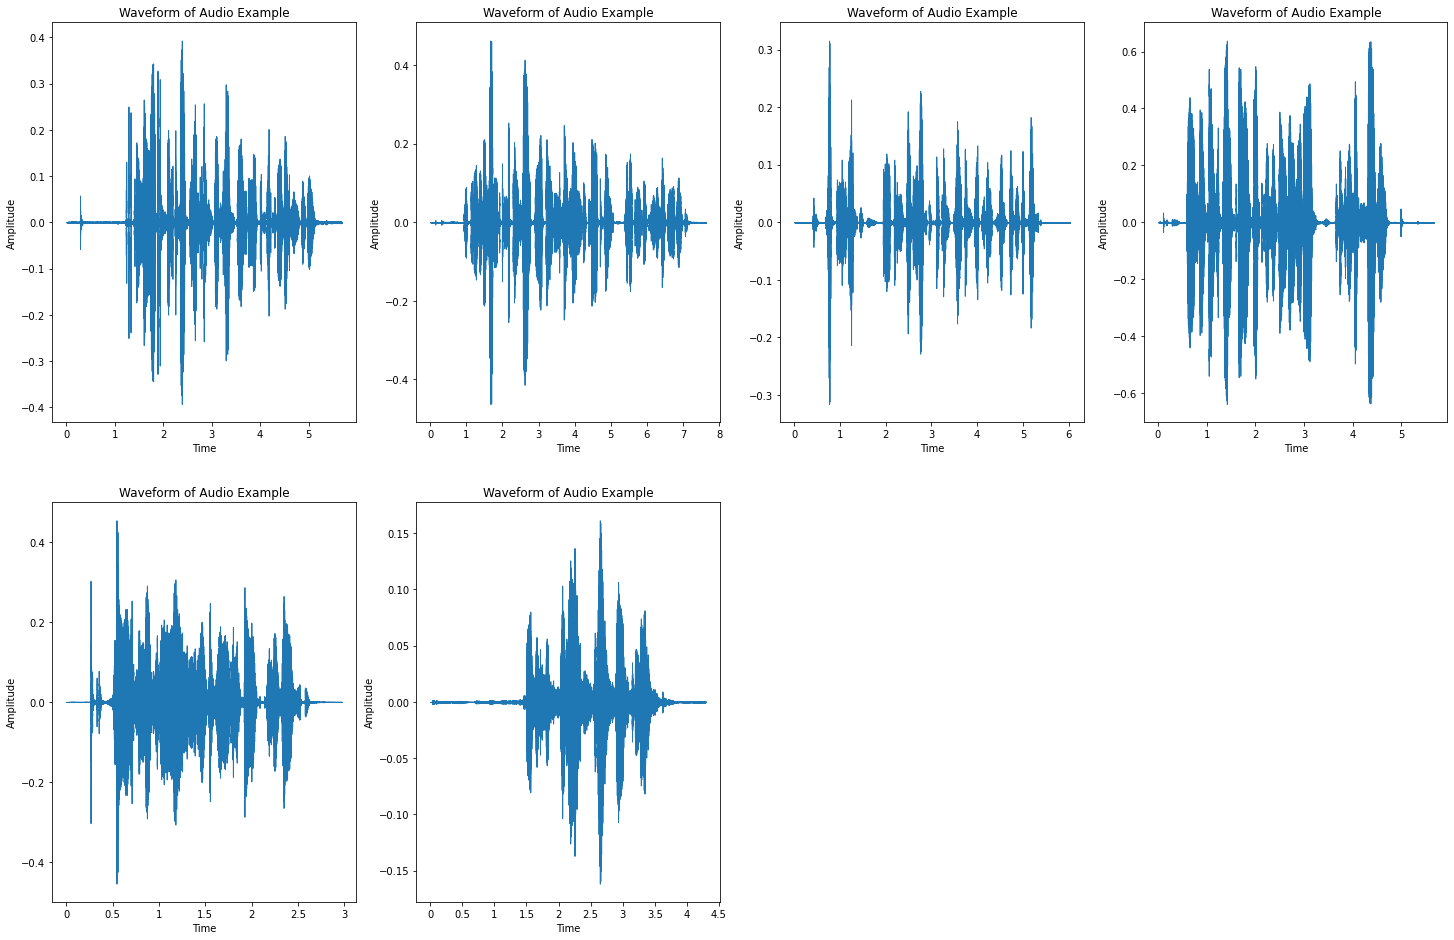

In [48]:
#@title Waveform_of_Audio_Examples
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt
import librosa
import glob
from IPython.display import Audio
import IPython.display as ipd


i=0

# Set the path to the folder containing the WAV files
wav_path = "/content/audio_wav_files_De"

# Use glob to get a list of all WAV files in the folder
wav_files = glob.glob(wav_path + "/*.wav")

# Loop through the list of WAV files and play each file
for example_file in wav_files:

    # Load the audio file using librosa
    audio, sample_rate = librosa.load(example_file)

    # Plot the mel spectrogram of our sample in figure of 12 sectors to fit 11 German Accent
    figure_Waveform_of_Audio_Example=plt.figure(12,figsize=(25,25))  

    if i <= 6:
      ax_Waveform_of_Audio_Example_123=figure_Waveform_of_Audio_Example.add_subplot(3,4,i+1)
      i+=1
    else:
      break
    # Plot our example audio file's waveform
    plt.rcParams['figure.figsize'] = (15,7)
    plt.title('Waveform of Audio Example')
    plt.ylabel('Amplitude')
    _ = librosa.display.waveshow(audio)
plt.savefig('Waveform_of_Audio_Examples.png',facecolor='white')

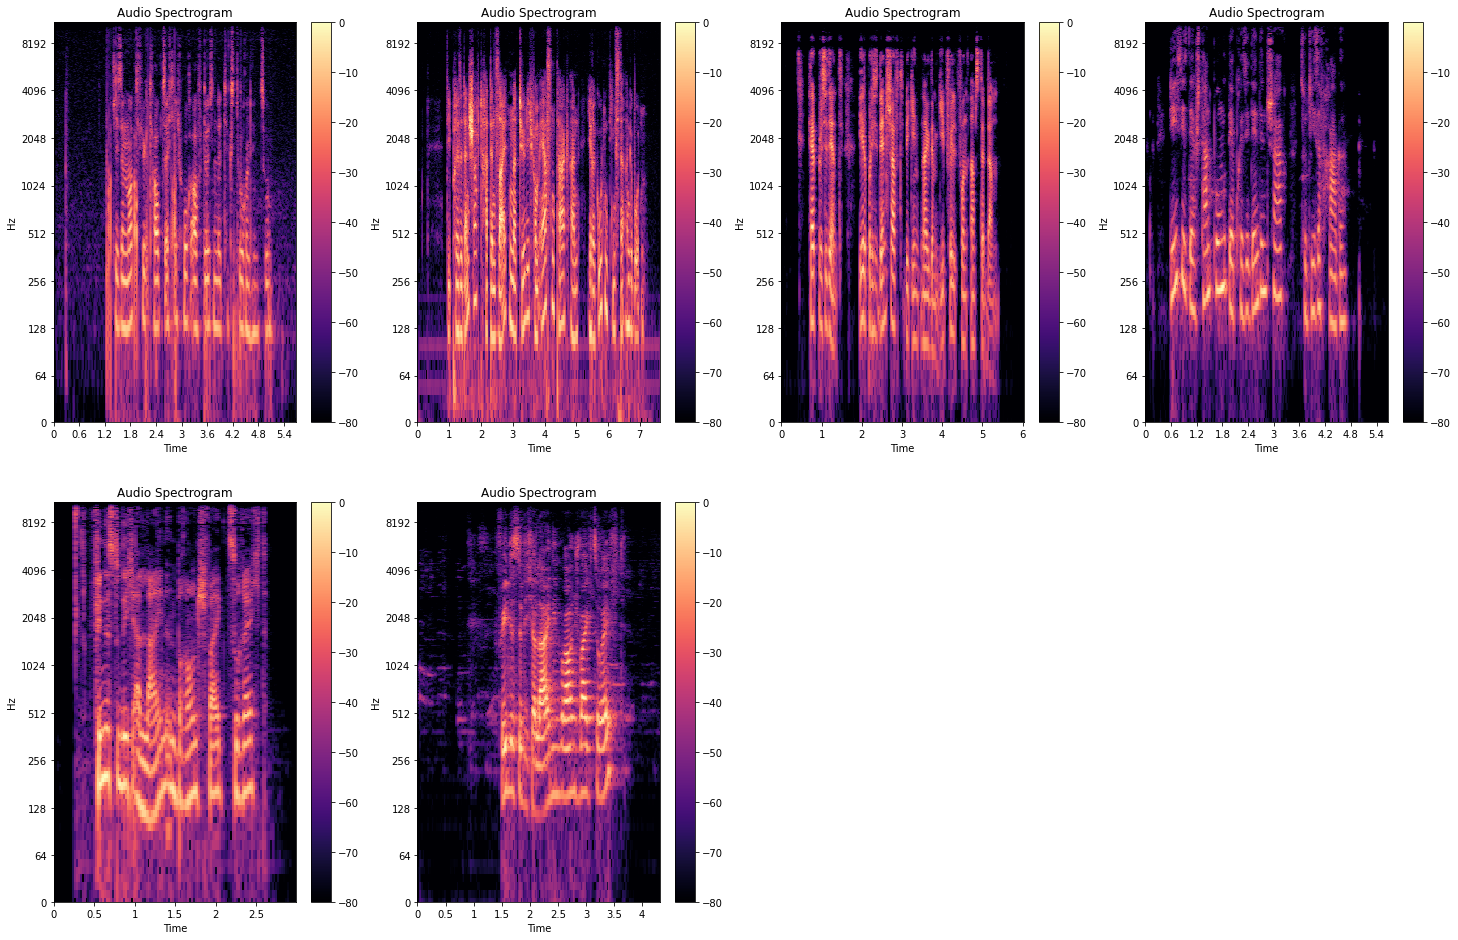

In [50]:
#@title Audio Spectrogram
import numpy as np 

i=0

# Set the path to the folder containing the WAV files
wav_path = "/content/audio_wav_files_De"

# Use glob to get a list of all WAV files in the folder
wav_files = glob.glob(wav_path + "/*.wav")

# Loop through the list of WAV files and play each file
for example_file in wav_files:

    # Load the audio file using librosa
    audio, sample_rate = librosa.load(example_file)


    # Plot the mel spectrogram of our sample in figure of 12 sectors to fit 11 German Accent
    figure_Audio_Spectrogram=plt.figure(12,figsize=(25,25))  

    if i <= 6:
      ax_Audio_Spectrogram_123=figure_Audio_Spectrogram.add_subplot(3,4,i+1)
      i+=1
    else:
      break


    # Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
    spec = np.abs(librosa.stft(audio))
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

    # Use log scale to view frequencies
    librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
    plt.colorbar()
    plt.title('Audio Spectrogram');
plt.savefig('Audio_Spectrogram.png',facecolor='white')

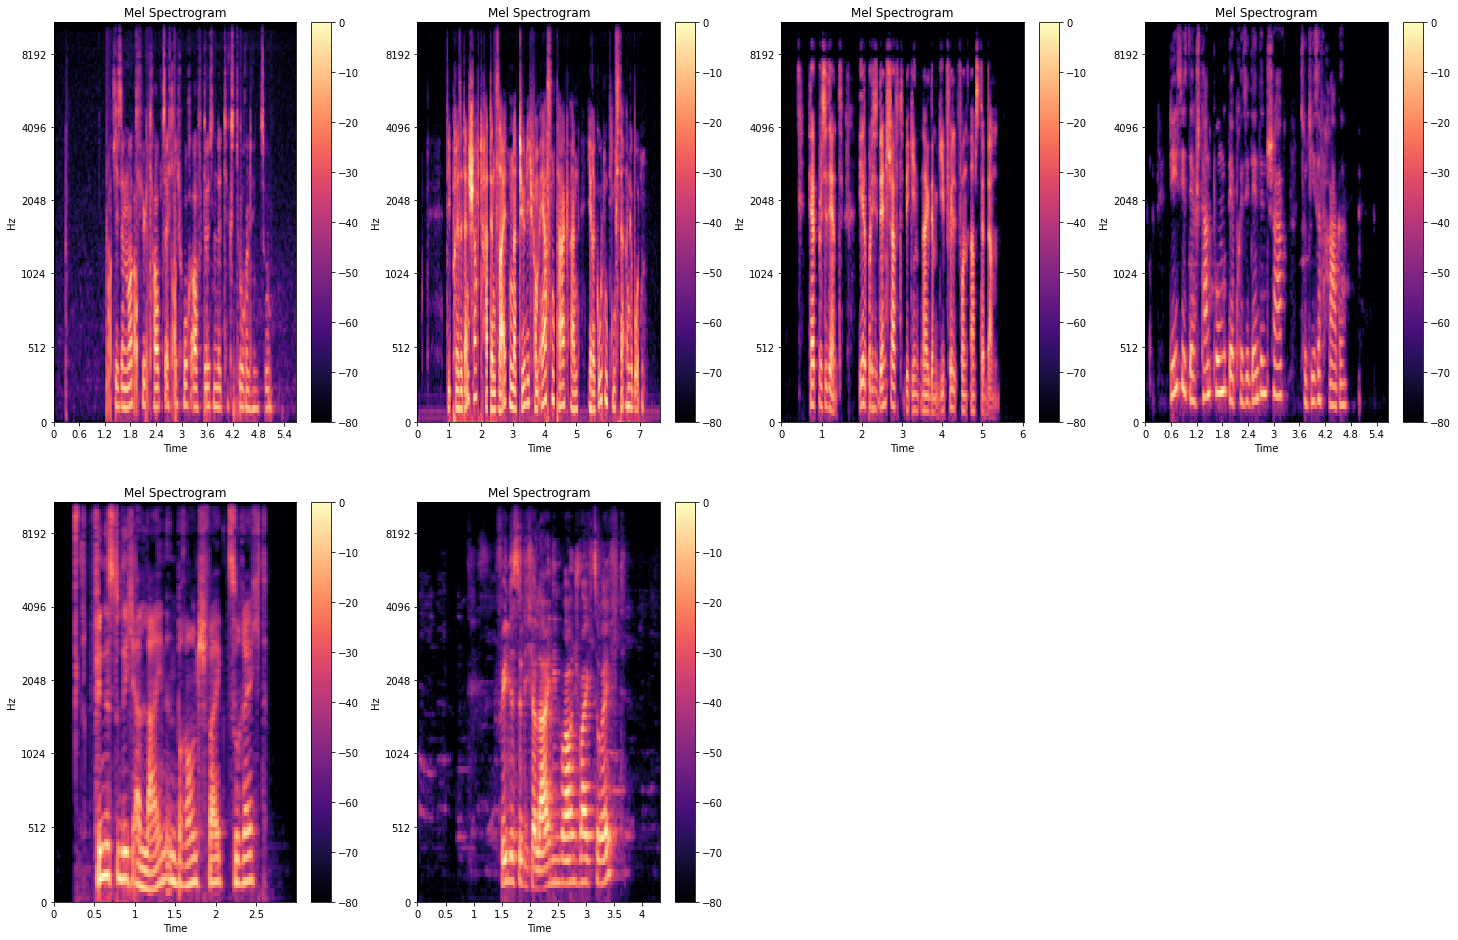

In [51]:
#@title Mel Spectrogram
import numpy as np 

i=0

# Set the path to the folder containing the WAV files
wav_path = "/content/audio_wav_files_De"

# Use glob to get a list of all WAV files in the folder
wav_files = glob.glob(wav_path + "/*.wav")

# Loop through the list of WAV files and play each file
for example_file in wav_files:

    # Load the audio file using librosa
    audio, sample_rate = librosa.load(example_file)

    # Plot the mel spectrogram of our sample in figure of 12 sectors to fit 11 German Accent
    figure_Audio_Spectrogram=plt.figure(12,figsize=(25,25))  
    if i <= 6:
      ax_Audio_Spectrogram_123=figure_Audio_Spectrogram.add_subplot(3,4,i+1)
      i+=1
    else:
      break

    # Plot the mel spectrogram of our sample
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    librosa.display.specshow(
        mel_spec_db, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('Mel Spectrogram');

plt.savefig('Mel_Spectrogram.png',facecolor='white')

In [56]:
def get_norm_attr(index_dict):
    norm_dict = {}
    for key in index_dict.keys():
        norm_dict[key] = index_dict[key]/np.sum(index_dict[key])
        np.set_printoptions(precision=4)
        #print(norm_dict[key])
        #break
    return norm_dict

###<font color=white> **Fetching frame allignmnets from the meta-data (using gentle)**</font> 


In [57]:
def get_frame_allignment(file, input_size):
    alligned = []
    spec_stride = 0.01
    window_size = 0.02
    times = file_meta[file]['end_times']
    last_idx = 0
    for i in range(input_size):
        frame_idx = i
        window_start = frame_idx*spec_stride
        window_mid = window_start + (window_size/2)
        alligned_phone = 'na'
        for j in range(len(times)):
            if (window_mid < times[j]):
                alligned_phone = file_meta[file]['phones'][j]
                break
        #assert alligned_phone != 'na', "Failed to fetch allignment"
        if(alligned_phone != 'na'):
            alligned.append(alligned_phone)
            last_idx = i
    pause_start = 0
    pause_end = len(alligned)
    for i in range(len(alligned)):
        if(alligned[i] != 'pause'):
            break
        pause_start = i
    
    for i in range(len(alligned)-1,-1,-1):
        if(alligned[i] != 'pause'):
            break
        pause_end = i
        
    #print(last_idx)
    #print(pause_start, pause_end)
    return alligned, pause_start +1, pause_end
    

In [58]:
##### find the Audio file name
trans_dict['schreib ihr halt ein paar liebe worte rein']

['common_voice_de_18946081', 'common_voice_de_18568843']

In [62]:
# if __name__ == "__main__":
#   Dict_results = json.load(open('results.json'))
#   for accent in Dict_results:
#     list_test_accent_txt_values = [v["reference"] for v in Dict_results[accent].values()]
# list_test_accent_txt_values

In [61]:
type(list_test_accent_txt_values)

list

###<font color=white> **Visualizing (signed) attributions**</font>  

In [63]:
# if __name__ == "__main__":
#   Dict_results = json.load(open('results.json'))
#   for accent in Dict_results:
#     list_test_accent_txt_values = [v["reference"] for v in Dict_results[accent].values()]

for file in trans_dict['schreib ihr halt ein paar liebe worte rein']:
    try:
        #file = 'common_voice_de_18946081' for file in ['schreib ihr halt ein paar liebe worte rein']:
        Fs, wav = wavfile.read('/content/audio_wav_files_De/{}.wav'.format(file_meta[file]['accent'],file))
        display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
        print(file_attr['output'], file_meta[file]['accent'])
        print(list(file_attr['attr dict'].keys()))
        normalized_attr = get_norm_attr(file_attr['attr dict'])
        keys = list(normalized_attr.keys())
        input_size = len(file_attr['attr dict'][list(file_attr['attr dict'].keys())[0]]) # calculate properly once
        buffer = 10
    #print(get_frame_allignment(file,input_size))
    #     with np.printoptions(precision=4, suppress=True):
    #         print(normalized_attr[1][:291])
        plot_vertical = False
        idx = 0
        if(plot_vertical):
            fig = plt.figure(figsize = (1,35))
            print(get_frame_allignment(file, input_size))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')
            #plt.yticks(rotation=) 
            #plt.yticks(range(allignments.shape[0]),list(allignments))
            plt.show()
        else:
            
            fig = plt.figure(figsize = (37,1))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            #actual_size = len(allignments)
            
            print('for',file_attr['output'][keys[idx]])
            sns.heatmap(np.expand_dims(normalized_attr[keys[idx]][p_start - buffer:p_end + buffer], axis = 0), fmt="", cmap='RdBu')
            #plt.yticks(rotation=) 
            modified_allignments = allignments[p_start - buffer:p_end + buffer]
            #phone_centres = []
            phone_labels = [x[0] for x in groupby(modified_allignments)]
            len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
            idx_list = [0]
            ticks_list = []
            for l in len_list:
                ticks_list.append(idx_list[-1] + l//2)
                idx_list.append(idx_list[-1] + l)
                
           
            plt.xticks(ticks_list,phone_labels, rotation = 90)
            
            for j in idx_list:
                plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
                plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)
                
                
                
            plt.show()
    #break
    except:
        print('failed for file : {}'.format(file))
        continue
    

failed for file : common_voice_de_18946081
failed for file : common_voice_de_18568843


###<font color="00ff00">  **Visualizing (modulus/magnitude) attributions**</font>


###<font color=white> Generate **|*Input.Gradient*|** Attributution at grapheme-level</font> 

In [ ]:
#for file in trans_dict["I'm going to them."]:
def inp_grad_grapheme(file, idx):
    try:
        #file = 'common_voice_en_110121'
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])
#         print(list(file_attr['attr dict'].keys()))
        normalized_attr = get_norm_attr(file_attr['attr dict'])
        keys = list(normalized_attr.keys())
        input_size = len(file_attr['attr dict'][list(file_attr['attr dict'].keys())[0]]) # calculate properly once
        buffer = 10
    #print(get_frame_allignment(file,input_size))
    #     with np.printoptions(precision=4, suppress=True):
    #         print(normalized_attr[1][:291])
        plot_vertical = False
        #idx = 0
        
        if(plot_vertical):
            fig = plt.figure(figsize = (1,35))
            print(get_frame_allignment(file, input_size))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')
            #plt.yticks(rotation=) 
            #plt.yticks(range(allignments.shape[0]),list(allignments))
            plt.show()
        else:
            
            fig = plt.figure(figsize = (37,1))
            #print(allignments)
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            #actual_size = len(allignments)
            
            print('for',file_attr['output'][keys[idx]])
            sns.heatmap(np.expand_dims(np.abs(normalized_attr[keys[idx]][p_start - buffer:p_end + buffer])/np.sum(np.abs(normalized_attr[keys[idx]][p_start - buffer:p_end + buffer])), axis = 0), fmt="", cmap='Blues')
            #plt.yticks(rotation=) 
            modified_allignments = allignments[p_start - buffer:p_end + buffer]
            phone_labels = [x[0] for x in groupby(modified_allignments)]
            len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
            idx_list = [0]
            ticks_list = []
            for l in len_list:
                ticks_list.append(idx_list[-1] + l//2)
                idx_list.append(idx_list[-1] + l)
                
            #ticks_list.append((idx_list[-1] + len(modified_allignments))//2)   
            
            plt.xticks(ticks_list,phone_labels, rotation = 90)
            
            for j in idx_list:
                plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
                plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)
            plt.show()
                
    #break
    except:
        print('failed for file : {}'.format(file))
        #continue
    

##### Helper functions for word-level allignments

In [ ]:
def get_space(inp):
    spaces = []
    for idx, val in enumerate(inp):
        if(val == ' '): spaces.append(idx)
    return spaces

In [ ]:
def get_words(test_list, split_list,spaces):
    temp = zip(chain([0], split_list), chain(split_list, [None])) 
    res = list(test_list[i : j] for i, j in temp) 
    #print(res)
    final_res = []
    for l in res:
        if(l[0] in spaces):
            final_res.append([l[0]])
            final_res.append(l[1:])
        else: 
            final_res.append(l)
    #print(final_res)
    return final_res

In [ ]:
def get_words_wo_space(test_list, split_list,spaces):
    temp = zip(chain([0], split_list), chain(split_list, [None])) 
    res = list(test_list[i : j] for i, j in temp) 
    #print(res)
    final_res = []
    for l in res:
        if(l[0] in spaces):
            final_res.append([l[0]])
            final_res.append(l[1:])
        else: 
            final_res.append(l)
    #print(final_res)
    return final_res

##### Generate **|*Input.Gradient*|** Attributution at word-level 

In [ ]:
#for file in trans_dict["I'm going to them."]:
def inp_grad_word(file, word_idx):
    try:
    #file = 'common_voice_en_110121'
    #print(file)
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])

    #         print(file_attr['output'].split(' '))
        normalized_attr = get_norm_attr(file_attr['attr dict'])
        keys = list(normalized_attr.keys())
#         print(keys)
        spaces = get_space(file_attr['output'])
        indices = [keys.index(x) for x in spaces]
        words = get_words(keys,indices, spaces)
        input_size = len(file_attr['attr dict'][list(file_attr['attr dict'].keys())[0]]) # calculate properly once
        buffer = 10
        plot_vertical = False
        #word_idx = 0

        word_activation = np.sum(np.asarray([np.abs(normalized_attr[idx]) for idx in words[word_idx]] ), axis = 0)

        if(plot_vertical):
            fig = plt.figure(figsize = (1,35))
            print(get_frame_allignment(file, input_size))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')

            plt.show()
        else:
            str_list = []
            for x in words[word_idx]:
                str_list.append(file_attr['output'][x])


            print(''.join(str_list))
            fig = plt.figure(figsize = (37,1))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            #actual_size = len(allignments)

            sns.heatmap(np.expand_dims(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer]), axis = 0), fmt="", cmap='Blues')
            #plt.yticks(rotation=) [p_start - buffer:p_end + buffer]
            modified_allignments = allignments[p_start - buffer:p_end + buffer]
            phone_labels = [x[0] for x in groupby(modified_allignments)]
            len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
            idx_list = [0]
            ticks_list = []
            for l in len_list:
                ticks_list.append(idx_list[-1] + l//2)
                idx_list.append(idx_list[-1] + l)


            plt.xticks(ticks_list,phone_labels, rotation = 90)

            for j in idx_list:
                plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
                plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)


            plt.show()
    
    except:
        print('failed for file : {}'.format(file))
#         continue
    

##### Helper functions to compare WERs

In [ ]:
def wer(s1, s2):
        """
        Computes the Word Error Rate, defined as the edit distance between the
        two provided sentences after tokenizing to words.
        Arguments:
            s1 (string): space-separated sentence
            s2 (string): space-separated sentence
        """

        # build mapping of words to integers
        b = set(s1.split() + s2.split())
        word2char = dict(zip(b, range(len(b))))

        # map the words to a char array (Levenshtein packages only accepts
        # strings)
        w1 = [chr(word2char[w]) for w in s1.split()]
        w2 = [chr(word2char[w]) for w in s2.split()]

        return Lev.distance(''.join(w1), ''.join(w2))


In [ ]:
transcript_wer = {}
#lm_wer = {}
accent_lm_wer = {x: [] for x in ['us', 'indian','african','canada','australia','england','scotland']}
accent_wer = {x: [] for x in ['us', 'indian','african','canada','australia','england','scotland']}

In [ ]:
with open('wers.pickle', 'rb') as l:
    lm_wer = pickle.load(l)
    

In [ ]:
for transcript in transcripts:
    transcript_ = transcript.strip().upper()
    wer_dict = {}

    valid_punctuation = string.punctuation.replace("'","")
    processed_transcript = transcript_.translate(str.maketrans({a:None for a in valid_punctuation }))
    #print(processed_transcript)       
    for file in trans_dict[transcript]:
        try:
            with open('attribution/{}.pickle'.format(file), 'rb') as j:
                file_attr = pickle.load(j)
            accent = file_meta[file]['accent']
            
            #print(accent)
            output = file_attr['output'].replace('_', '')
            #print(output)
            num_tokens = len(processed_transcript.split())
            wer_ = 100*wer(processed_transcript, output)/num_tokens
            wer_dict[accent] = wer_
            accent_wer[accent].append(wer_)
            accent_lm_wer[accent].append(lm_wer[file]['wer'])
            
        except:
            continue
        
    
    transcript_wer[transcript] = wer_dict

        

In [ ]:
print('accent','|', 'greedy','|', 'lm rescored','|', 'num of files')
for key in accent_wer.keys():
    print(key,'|', np.asarray(accent_wer[key]).mean(),'|', np.asarray(accent_lm_wer[key]).mean(),'|', len(accent_wer[key]))

In [ ]:
#get_colour = {'us':'k', 'indian':'g','african':'b','canada':'r','australia':'c','england':'m','scotland':'y'}

##### Generate **|*Gradient*|** Attribution at grapheme-level

In [ ]:
#for file in trans_dict["I'm going to them."]:
def grad_grapheme(file, idx):
    try:
        #file = 'common_voice_en_110121'
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])
#         print(list(file_attr['grad_dict'].keys()))
        normalized_attr = get_norm_attr(file_attr['grad_dict'])
        keys = list(normalized_attr.keys())
        input_size = len(file_attr['grad_dict'][list(file_attr['grad_dict'].keys())[0]]) # calculate properly once
        buffer = 10
    #print(get_frame_allignment(file,input_size))
    #     with np.printoptions(precision=4, suppress=True):
    #         print(normalized_attr[1][:291])
        plot_vertical = False
        #idx = 0

        if(plot_vertical):
            fig = plt.figure(figsize = (1,35))
            print(get_frame_allignment(file, input_size))
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')
            #plt.yticks(rotation=) 
            #plt.yticks(range(allignments.shape[0]),list(allignments))
            plt.show()
        else:

            fig = plt.figure(figsize = (37,1))
            #print(allignments)
            allignments, p_start, p_end = get_frame_allignment(file, input_size)
            allignments = np.asarray(allignments)            
            actual_size = len(allignments)
            #actual_size = len(allignments)

            print('for',file_attr['output'][keys[idx]])
            sns.heatmap(np.expand_dims(np.abs(normalized_attr[keys[idx]][p_start - buffer:p_end + buffer])/np.sum(np.abs(normalized_attr[keys[idx]][p_start - buffer:p_end + buffer])), axis = 0), fmt="", cmap='Greens')
            #plt.yticks(rotation=) 
            modified_allignments = allignments[p_start - buffer:p_end + buffer]
            phone_labels = [x[0] for x in groupby(modified_allignments)]
            len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
            idx_list = [0]
            ticks_list = []
            for l in len_list:
                ticks_list.append(idx_list[-1] + l//2)
                idx_list.append(idx_list[-1] + l)

            #ticks_list.append((idx_list[-1] + len(modified_allignments))//2)   

            plt.xticks(ticks_list,phone_labels, rotation = 90)

            for j in idx_list:
                plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
                plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)
            plt.show()

    #break
    except:
        print('failed for file : {}'.format(file))
#         continue
    

##### Generate **|*Gradient*|** Attribution at word-level

In [ ]:
#for file in trans_dict["I'm going to them."]:
def grad_word(file, word_idx):
    #try:
        #file = 'common_voice_en_110121'
        #print(file)
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
    with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
        file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])

#         print(file_attr['output'].split(' '))
    normalized_attr = get_norm_attr(file_attr['grad_dict'])
    keys = list(normalized_attr.keys())
#         print(keys)
    spaces = get_space(file_attr['output'])
    indices = [keys.index(x) for x in spaces]
    words = get_words(keys,indices, spaces)
    input_size = len(file_attr['grad_dict'][list(file_attr['grad_dict'].keys())[0]]) # calculate properly once
    buffer = 10
    plot_vertical = False
    #word_idx = 8
#         print(words)
#         print(keys)

    word_activation = np.sum(np.asarray([np.abs(normalized_attr[idx]) for idx in words[word_idx]] ), axis = 0)

    if(plot_vertical):
        fig = plt.figure(figsize = (1,35))
        print(get_frame_allignment(file, input_size))
        allignments, p_start, p_end = get_frame_allignment(file, input_size)
        allignments = np.asarray(allignments)            
        actual_size = len(allignments)
        sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')

        plt.show()
    else:
        str_list = []
        for x in words[word_idx]:
            str_list.append(file_attr['output'][x])


        print('Focus word:',''.join(str_list))
        fig = plt.figure(figsize = (37,1))
        allignments, p_start, p_end = get_frame_allignment(file, input_size)
        allignments = np.asarray(allignments)            
        actual_size = len(allignments)
        #actual_size = len(allignments)

        sns.heatmap(np.expand_dims(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer]), axis = 0), fmt="", cmap='Greens')
        #plt.yticks(rotation=) [p_start - buffer:p_end + buffer]
        modified_allignments = allignments[p_start - buffer:p_end + buffer]
        phone_labels = [x[0] for x in groupby(modified_allignments)]
        len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
        idx_list = [0]
        ticks_list = []
        for l in len_list:
            ticks_list.append(idx_list[-1] + l//2)
            idx_list.append(idx_list[-1] + l)


        plt.xticks(ticks_list,phone_labels, rotation = 90, fontsize=16)

        for j in idx_list:
            plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
            plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)


        plt.show()
#         fig2 = plt.figure(figsize = (37,1))
#         my_arr = word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer])
#         plt.plot(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer]))
#         xk = np.arange(len(my_arr))
#         #pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)        
#         custm = st.rv_discrete(name='custm', values=(xk, my_arr))
#         print(custm.mean(), custm.std())
#         #print(my_arr.mean(), my_arr.std())
#         #plt.xticks(ticks_list,phone_labels, rotation = 90)
#         plt.xlim(xmin = 0, xmax = len(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer])))
        
        
#         plt.show()

#     except:
#         print('failed for file : {}'.format(file))
        #continue
    

In [ ]:
target_transcript = "I'm going to them." # indian gowmedo
target_transcript = 'The burning fire had been extinguished.' #across accents
#target_transcript = 'It was the first time she had done that.' #SHE across accents, sheld in usm hi in indian
#target_transcript = 'I was scared, but wasted no time in going out and crossing the bridge to the sand pits.'
grapheme_idx = 0
word_idx = 2

### Visualizing Attributions for all accents

#### (A) Grapheme-level

In [ ]:
fig = plt.figure(figsize = (37,20))
for file in trans_dict[target_transcript]:
    try:
        Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
        display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
        print(file_attr['output'], file_meta[file]['accent'])
        #print(list(file_attr['attr dict'].keys()))
        inp_grad_grapheme(file, grapheme_idx)
        grad_grapheme(file,grapheme_idx)
        
    except:
        continue

#### (B) Word Level

In [ ]:
word_idx = 4
for file in trans_dict[target_transcript]:
    try:
        Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
        display(Audio(wav, rate=Fs))
        with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
            file_attr = pickle.load(j)
        print(file_attr['output'], file_meta[file]['accent'])
        #print(list(file_attr['attr dict'].keys()))
        inp_grad_word(file, word_idx)
        #print(file_meta[file]['accent'])
        grad_word(file,word_idx)
#     break
    except:
        continue

In [ ]:
syllables = pickle.load(open('syll.pickle','rb'))
syllables['THE']

In [ ]:
syllables['PEOPLE']

In [ ]:
def is_correct(s1, s2, idx):
        """
        Computes the Word Error Rate, defined as the edit distance between the
        two provided sentences after tokenizing to words.
        Arguments:
            s1 (string): space-separated sentence
            s2 (string): space-separated sentence
        """

        # build mapping of words to integers
        b = set(s1.split() + s2.split())
        word2char = dict(zip(b, range(len(b))))

        # map the words to a char array (Levenshtein packages only accepts
        # strings)
        w1 = [chr(word2char[w]) for w in s1.split()]
        w2 = [chr(word2char[w]) for w in s2.split()]
        ops = Lev.editops(''.join(w1), ''.join(w2))
        #print(ops)
        words_changed = [x[1] for x in ops]
        
        return not idx in words_changed
        


In [ ]:
cond_transcripts = []
for t in transcripts:
    
    order = sorted(transcript_wer[t], key=lambda k: transcript_wer[t][k])
    #print(order)
    if(order[0]== 'canada' or order[0] == 'us'):
        cond_transcripts.append(t)
    
 # do this after LM rescoring ?   

In [ ]:
print(len(cond_transcripts))

In [ ]:
print(cond_transcripts[:20])

In [ ]:
all_words = []
valid_punctuation = string.punctuation.replace("'","")
for t in transcripts:
    t_ = t.strip().upper()
    t_ = t_.translate(str.maketrans({a:None for a in valid_punctuation }))
    all_words.extend(t_.split())
    #print(all_words)
    #break
    

##### Calculate Most Frequent Words

In [ ]:
allWordDist = nltk.FreqDist(all_words)
record_frequency = allWordDist.most_common(75)
most_frequent = [ x[0] for x in record_frequency]

In [ ]:
print(most_frequent)


In [ ]:
most_frequent = ['THE', 'TO', 'AND', 'A', 'OF', 'WAS', 'I', 'IT', 'HE', 'THAT', 'IN', 'YOU', 'HAD', 'HIS', 'AS', 'BUT', 'WITH', 'BOY', 'IS', 'THEY', 'WERE', 'FOR', 'AT', 'ABOUT', 'BE', 'ON', 'ME', 'THERE', 'FROM', 'MY', 'WE', 'HIM', 'HAVE', 'NOT', 'OUT', 'THIS', 'SOME', 'ALL', 'THOUGHT', 'AN', 'PEOPLE', 'BEEN', 'HER', 'INTO', 'TIME', 'YOUR', 'SO', 'ARE', 'HERE', 'CAN', 'GET', 'THEN', 'WAY', 'SHE', 'ONE', 'WHEN', 'ONLY', "DON'T", "I'M", 'OTHER', 'UP', 'WHAT', 'SEE', 'COULD', 'LITTLE', 'NO', 'GOING', 'DO', 'WILL', 'IF', 'ITS', 'MORE', 'BY', 'MAN', 'STILL']

In [ ]:
mf_us = {x:[] for x in most_frequent}
mf_canada = {x:[] for x in most_frequent}
mf_indian = {x:[] for x in most_frequent}
mf_african = {x:[] for x in most_frequent}
mf_england = {x:[] for x in most_frequent}
mf_scotland = {x:[] for x in most_frequent}
mf_australian = {x:[] for x in most_frequent}
mf_accents = {'us':mf_us,'canada':mf_canada,'indian':mf_indian,'african':mf_african,'england':mf_england,'scotland':mf_scotland,'australia':mf_australian}

In [ ]:
#transcript_freq = {}
for t in transcripts:
    
    t_ = t.strip().upper()
    t_ = t_.translate(str.maketrans({a:None for a in valid_punctuation }))
    
    t_list = t_.split()
    true_nz_counts = {x:t_list.count(x) for x in most_frequent if t_list.count(x) > 0}
    true_nz_indices = {x:[index for index, value in enumerate(t_list) if value == x] for x in true_nz_counts.keys()}
    #print(true_nz_counts)
    for file in trans_dict[t]:
        try:
            acc = {x:0 for x in true_nz_counts.keys()}
            with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
                file_attr = pickle.load(j)
            op = file_attr['output'].replace('_', '')
            accent = file_meta[file]['accent']
            
            
            for w in true_nz_counts.keys():
                
                for j in true_nz_indices[w]:
                #mf_accents[accent][w][0].append(true_nz_counts[w])
                    
                    mf_accents[accent][w].append(is_correct(t_,op,j))
                #print(cond)
           
                #mf_accents[accent][w][1].append(min(op.split().count(w),true_nz_counts[w]))
        except:
            continue
    
        #print(mf_accents[accent])
    
        

In [ ]:
#print(mf_us)
mf_us = {x:[] for x in most_frequent}
mf_canada = {x:[] for x in most_frequent}
mf_indian = {x:[] for x in most_frequent}
mf_african = {x:[] for x in most_frequent}
mf_england = {x:[] for x in most_frequent}
mf_scotland = {x:[] for x in most_frequent}
mf_australian = {x:[] for x in most_frequent}
avg_stats =  {'us':mf_us,'canada':mf_canada,'indian':mf_indian,'african':mf_african,'england':mf_england,'scotland':mf_scotland,'australia':mf_australian}
#print(avg_stats)

In [ ]:
for a in mf_accents.keys():
    print(a)
    #a = 'indian'
    for w in mf_accents[a].keys():
        
        avg_stats[a][w].append(sum(mf_accents[a][w])/len(mf_accents[a][w]))
        
        #print(w,np.asarray(mf_accents[a][w]).mean(),np.asarray(mf_accents[a][w]).std())
    
  

##### Accuracy of correctly predicting most frequent words across accents

In [ ]:
for a in avg_stats.keys():
    temp = []
    for k in avg_stats[a].keys():
        temp.append(avg_stats[a][k][0])
    print(a, np.asarray(temp).mean(), np.asarray(temp).std())

In [ ]:
us = [0.7803950509449439, 0.121667382968697]
canada =[0.8572825991328428, 0.10528083986888306]
indian =[0.513035145387385, 0.18122269227720902]
african =[0.7522708227207352, 0.1365991362807828]
england =[0.6919775766172566, 0.16313311778908576]
scotland =[0.6535836230311115, 0.1547649386757295]
australia =[0.7459351700052215, 0.14893722495703424]
acc = {'us':us,'indian':indian,'canada':canada,'african':african,'england':england,'scotland':scotland,'australia':australia}

In [ ]:
objects = ['us', 'indian', 'african', 'canada', 'england', 'australia', 'scotland']
y_pos = np.arange(len(objects))
#fig = plt.figure(figsize = (15,10))
# def create_plots(layer, name):
fig = plt.figure(figsize = (10,5))
y_pos = np.arange(len(objects))
y = [100*acc[x][0] for x in objects ]
err = [100*acc[x][1]  for  x in objects]
#plt.plot(y_pos, y,'-o', alpha=0.7,)
#plt.figure()
plt.bar(y_pos, y, yerr= err,align='center', capsize=7, edgecolor='k')
plt.xticks(y_pos, objects, fontsize=14)
plt.yticks(fontsize=14)
# plt.errorbar(y_pos, y, yerr=err,fmt='-o',capsize=5 )
# plt.xticks(y_pos, objects)
#plt.ylim(ymin = 0)obj
#plt.axhline(14.28, linewidth=1, color='k')
plt.ylabel('Accuracy %',color='k',fontsize=18)
plt.xlabel('Accents',color='k',fontsize=18)
#plt.title('MF words classificant trends')
#plt.legend(frameon=False)
plt.savefig('MF-words.pdf',bbox_inches='tight')
plt.show()


##### Helper Function for alligning words with frames

In [ ]:
def get_word_allignment(file, input_size):
    alligned = []
    spec_stride = 0.01
    window_size = 0.02
    times = file_meta[file]['end_times']
    json_path = 'my_data/align_common/{}.json'.format(file)
    with open(json_path,'r') as j:
        gentle = json.load(j)
    word_ends = []
    word_ends.append(('start',times[0]))
    for g in range(len(gentle['words'])):
        word_ends.append((gentle['words'][g]['word'], gentle['words'][g]['end']))
    word_ends.append(('end',times[-1]))
    
    #last_idx = 0
    for i in range(input_size):
        frame_idx = i
        window_start = frame_idx*spec_stride
        window_mid = window_start + (window_size/2)
        alligned_word = 'na'
        for j in range(len(word_ends)):
            if (window_mid < word_ends[j][1]):
                alligned_word = word_ends[j][0]
                break
        #assert alligned_phone != 'na', "Failed to fetch allignment"
        if(alligned_word != 'na'):
            alligned.append(alligned_word)
            #last_idx = i
    pause_start = 0
    pause_end = len(alligned)
    for i in range(len(alligned)):
        if(alligned[i] != 'start'):
            break
        pause_start = i
    
    for i in range(len(alligned)-1,-1,-1):
        if(alligned[i] != 'end'):
            break
        pause_end = i
        
    #print(last_idx)
    
    return alligned, pause_start+1, pause_end,
    

In [ ]:
wrd = get_word_allignment('common_voice_en_540956', 100000)

### Visualizing attribution of a particular word

In [ ]:
def grad_clubbed_word(file, word_idx, disable_prints = False):
    
    #try:
        #file = 'common_voice_en_110121'
        #print(file)
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
    with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
        file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])

#         print(file_attr['output'].split(' '))
    normalized_attr = get_norm_attr(file_attr['grad_dict'])
    keys = list(normalized_attr.keys())
#         print(keys)
    spaces = get_space(file_attr['output'])
    indices = [keys.index(x) for x in spaces]
    words = get_words(keys,indices, spaces)
    input_size = len(file_attr['grad_dict'][list(file_attr['grad_dict'].keys())[0]]) # calculate properly once
    buffer = 10
    plot_vertical = False
    #word_idx = 8
#         print(words)
#         print(keys)

    word_activation = np.sum(np.asarray([np.abs(normalized_attr[idx]) for idx in words[word_idx]] ), axis = 0)
    

    if(plot_vertical):
        fig = plt.figure(figsize = (1,35))
        print(get_frame_allignment(file, input_size))
        allignments, p_start, p_end = get_word_allignment(file, input_size)
        allignments = np.asarray(allignments)            
        actual_size = len(allignments)
        sns.heatmap(np.expand_dims(normalized_attr[1][:actual_size], axis = 1),annot = np.expand_dims(allignments, axis = 1), fmt="", cmap='RdBu')

        plt.show()
    else:
        str_list = []
        for x in words[word_idx]:
            str_list.append(file_attr['output'][x])


        
        allignments, p_start, p_end = get_frame_allignment(file, input_size)
        wrd_allignments,w_start,w_end = get_word_allignment(file, input_size)
        wrd_allignments = np.asarray(wrd_allignments)
        allignments = np.asarray(allignments)            
        actual_size = len(allignments)
        #actual_size = len(allignments)
        
        #plt.yticks(rotation=) [p_start - buffer:p_end + buffer]
        modified_allignments = allignments[p_start - buffer:p_end + buffer]
        assert len(wrd_allignments) == len(allignments), "dimensions don't match"
        
        modified_wrd_allignments = wrd_allignments[w_start - buffer:w_end + buffer]
        #assert len(modified_wrd_allignments) == len(modified_allignments), "dimensions don't match"
        #wrds = [list(x[0]) for x in groupby(modified_wrd_allignments)]
        wrd_labels = [list(x[1]) for x in groupby(modified_wrd_allignments)]
        #print(wrd_labels)
        wrd_indices = [0]
        for j in wrd_labels:
            wrd_indices.append(wrd_indices[-1] + len(j))
        #print(wrd_indices)
        my_arr = word_activation[w_start - buffer:w_end + buffer]/np.sum(word_activation[w_start - buffer:w_end + buffer])
        wrd_combined_wonorm = []
        wrd_combined = []
        for m in range(len(wrd_labels)):
            wrd_combined_wonorm.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]]))
            wrd_combined.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]])/len(wrd_labels[m]))
        wrd_combined = np.asarray(wrd_combined)
        
        wrd_combined = wrd_combined/np.sum(wrd_combined)
        
        #print(np.asarray(wrd_combined).sum())
        if(not disable_prints):
            print(''.join(str_list))
            fig = plt.figure(figsize = (37,1))
            sns.heatmap(np.expand_dims(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer]), axis = 0), fmt="", cmap='Greens')
            phone_labels = [x[0] for x in groupby(modified_allignments)]
            len_list = [len(list(x[1])) for x in groupby(modified_allignments)]
            idx_list = [0]
            ticks_list = []
            for l in len_list:
                ticks_list.append(idx_list[-1] + l//2)
                idx_list.append(idx_list[-1] + l)


            plt.xticks(ticks_list,phone_labels, rotation = 90)

            for j in idx_list:
                plt.axvline(x=j, color='w', linestyle='-', linewidth=2.5)
                plt.axvline(x=j, color='k', linestyle='--', linewidth=2.5)


            plt.show()
            print(wrd_combined_wonorm)
            print(wrd_combined)  
            fig2 = plt.figure(figsize = (37,1))
            #my_arr = word_activation[w_start - buffer:w_end + buffer]/np.sum(word_activation[w_start - buffer:w_end + buffer])
            plt.plot(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer]))
            xk = np.arange(len(my_arr))
            #pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)        
            custm = st.rv_discrete(name='custm', values=(xk, my_arr))
            print(custm.mean(), custm.std())
              
            #print(my_arr.mean(), my_arr.std())
            #plt.xticks(ticks_list,phone_labels, rotation = 90)
            plt.xlim(xmin = 0, xmax = len(word_activation[p_start - buffer:p_end + buffer]/np.sum(word_activation[p_start - buffer:p_end + buffer])))


            plt.show()

            fig3 = plt.figure(figsize = (37,1))
            my_arr = wrd_combined
            plt.plot(my_arr)
            xk = np.arange(len(my_arr))
            #pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)        
            custm = st.rv_discrete(name='custm', values=(xk, my_arr))
            print(custm.mean(), custm.std())
            #print(my_arr.mean(), my_arr.std())
            #plt.xticks(ticks_list,phone_labels, rotation = 90)
            plt.xlim(xmin = 0, xmax = len(my_arr))


            plt.show()
        #else:
        return wrd_combined, wrd_combined_wonorm



##### Visualizing normalized attributions at granularity of frames and words

In [ ]:
#target_transcript = 'I was scared, but wasted no time in going out and crossing the bridge to the sand pits.'

for file in trans_dict[target_transcript]:
    Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
    display(Audio(wav, rate=Fs))
    with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
        file_attr = pickle.load(j)
    print(file_attr['output'], file_meta[file]['accent'])
    print(list(file_attr['attr dict'].keys()))
    #inp_grad_grapheme(file, grapheme_idx)
    print(file)
    distr, distr_wo = grad_clubbed_word(file, 2*idx, disable_prints=False)
                    #print(distr)
    max_idx = np.argmax(np.asarray(distr))
    max_idx_wo = np.argmax(np.asarray(distr_wo))
    custm = st.rv_discrete(name='custm', values=(np.arange(len(distr)), distr))
    spread = custm.expect(lambda x : (x- custm.mean())**2)
    print(max_idx,spread**0.5)
          
    #break

    

#### Analysis of attributions summed at word level (from transcription)

In [ ]:
mf_us = {x:([],[],[]) for x in most_frequent}
mf_canada = {x:([],[],[]) for x in most_frequent}
mf_indian = {x:([],[],[]) for x in most_frequent}
mf_african = {x:([],[],[]) for x in most_frequent}
mf_england = {x:([],[],[]) for x in most_frequent}
mf_scotland = {x:([],[],[]) for x in most_frequent}
mf_australian = {x:([],[],[]) for x in most_frequent}
max_accents = {'us':mf_us,'canada':mf_canada,'indian':mf_indian,'african':mf_african,'england':mf_england,'scotland':mf_scotland,'australia':mf_australian}

In [ ]:

for t in transcripts:
    
    t_ = t.strip().upper()
    t_ = t_.translate(str.maketrans({a:None for a in valid_punctuation }))
    #print(t_)
    t_list = t_.split()
    true_nz_counts = {x:t_list.count(x) for x in most_frequent if t_list.count(x) > 0}
    true_nz_indices = {x:[index for index, value in enumerate(t_list) if value == x] for x in true_nz_counts.keys()}
    
    for file in trans_dict[t]:
        
        try:   
            with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
                file_attr = pickle.load(j)
            op = file_attr['output'].replace('_', '')
            op_list = op.split()
            accent = file_meta[file]['accent']

            a_indices = {x:[index for index, value in enumerate(op_list) if value == x] for x in true_nz_counts.keys()}
        
            for w in true_nz_counts.keys():
                for idx in a_indices[w]:
                    # compute condition for correctness
                    distr, distr_wo = grad_clubbed_word(file, 2*idx, disable_prints=True)
                    #print(distr)
                    max_idx = np.argmax(np.asarray(distr))
                    max_idx_wo = np.argmax(np.asarray(distr_wo))
                    
            #print(custm.mean(), custm.std())
                    if(is_correct(op,t_,idx)):
                        custm = st.rv_discrete(name='custm', values=(np.arange(len(distr)), distr))
                        spread = custm.expect(lambda x : (x - max_idx)**2)
                        #print(spread)
                        max_accents[accent][w][2].append(spread**0.5)
                        
                        idx2 = true_nz_indices[w][a_indices[w].index(idx)]
                        max_accents[accent][w][0].append(max_idx == idx2 + 1)
                        max_accents[accent][w][1].append(max_idx_wo == idx2 + 1)
        except:
            continue

            
        #print(mf_accents[accent])
    


##### Accuracy of how often the word alligned from meta data has the highest cumulative attribtuion for words from transcription (given that word is transcribed correctly)

In [ ]:
for a in max_accents.keys():
    print(a)
    acc = ([],[],[])
    #a = 'indian'
    for w in mf_accents[a].keys():
        acc[0].append(sum(max_accents[a][w][0])/len(max_accents[a][w][0]))
        acc[1].append(sum(max_accents[a][w][1])/len(max_accents[a][w][1]))
        #acc[2].append(np.asarray(max_accents[a][w][2]).mean())
    print(np.asarray(acc[0]).mean(),np.asarray(acc[1]).mean(),np.asarray(acc[2]).mean())

In [ ]:
# us
# 0.822280626362392 0.7107428299869577
# canada
# 0.8579726753622985 0.7690201257461524
# indian
# 0.7958703395891465 0.6934186392183957
# african
# 0.8308889379878893 0.7204420312446458
# england
# 0.7781214935118137 0.7200572594990948
# scotland
# 0.8124665953005906 0.7094160821071285
# australia
# 0.7892047076340786 0.7292303868344401

In [ ]:
def cross_entropy(predictions, targets,N):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    #predictions = np.clip(predictions, epsilon, 1. - epsilon)
    #N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce




### EMD Calculations

##### EMD & entropy wrt baselines at word level. Wd1 and e1 correspond to emd and entropy between the segment of at attribution of frame corresponding to the word and a uniformly distributed baseline for the duration of the word respectively. Wd2 and e2 correspond to emd and entropy between the attribution of the entire transcription and a uniformly distributed baseline for the duration of the word and zero every where else respectively

In [ ]:
def grad_word_dist(file, word_idx, actual_idx, taper = False):
    
    #try:
        #file = 'common_voice_en_110121'
        #print(file)
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
    with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
        file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])

#         print(file_attr['output'].split(' '))
    normalized_attr = get_norm_attr(file_attr['grad_dict'])
    keys = list(normalized_attr.keys())
#         print(keys)
    spaces = get_space(file_attr['output'])
    indices = [keys.index(x) for x in spaces]
    words = get_words(keys,indices, spaces)
    input_size = len(file_attr['grad_dict'][list(file_attr['grad_dict'].keys())[0]]) # calculate properly once
    buffer = 10
    plot_vertical = False
    #word_idx = 8
#         print(words)
#         print(keys)

    word_activation = np.sum(np.asarray([np.abs(normalized_attr[idx]) for idx in words[word_idx]] ), axis = 0)
    


    str_list = []
    for x in words[word_idx]:
        str_list.append(file_attr['output'][x])


    #print(''.join(str_list))
    allignments, p_start, p_end = get_frame_allignment(file, input_size)
    wrd_allignments,w_start,w_end = get_word_allignment(file, input_size)
    wrd_allignments = np.asarray(wrd_allignments)
    allignments = np.asarray(allignments)            
    actual_size = len(allignments)
    
    modified_allignments = allignments[p_start - buffer:p_end + buffer]
    assert len(wrd_allignments) == len(allignments), "dimensions don't match"
    modified_allignments = allignments[w_start - buffer:w_end + buffer]
    modified_wrd_allignments = wrd_allignments[w_start - buffer:w_end + buffer]
    
    wrd_labels = [list(x[1]) for x in groupby(modified_wrd_allignments)]
#     print(wrd_labels)
    wrd_indices = [0]
    for j in wrd_labels:
        wrd_indices.append(wrd_indices[-1] + len(j))
#     print(wrd_indices)
    my_arr = word_activation[w_start - buffer:w_end + buffer]/np.sum(word_activation[w_start - buffer:w_end + buffer])
    m = actual_idx + 1
#     print(m)
    
    assert len(my_arr) == len(modified_wrd_allignments), 'assumption failed'
    word_frame = my_arr[wrd_indices[m]:wrd_indices[m+1]]
    word_frame_norm = word_frame/np.sum(word_frame)
    baseline_frame_ = np.ones(len(word_frame))/len(word_frame)
    baseline_frame = np.array(signal.tukey(int(2*len(word_frame))))
    if(not taper):
        baseline_frame = baseline_frame_
#     print('here')
#     print(len(baseline_frame))
#     print(len(baseline_wind[wrd_indices[m]:wrd_indices[m+1]]))

    baseline_frame = baseline_frame / sum(baseline_frame)
#     print(len(baseline_frame))
#     print(wrd_indices[m+1] - wrd_indices[m])
    count = len(set(modified_allignments[wrd_indices[m]:wrd_indices[m+1]]))#huersitic
    (wd1,e1) = 100*wd(word_frame_norm,baseline_frame_)/count, cross_entropy(word_frame_norm,baseline_frame_,count)
    baseline_wind = np.zeros(len(my_arr))
    if(not taper):
        baseline_wind[wrd_indices[m] :wrd_indices[m+1] ] = baseline_frame
    else : 
        if(wrd_indices[m] - len(word_frame)//2 >= 0 and wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 < len(my_arr)):
            baseline_wind[wrd_indices[m] - len(word_frame)//2 :wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 ] = baseline_frame
        elif(wrd_indices[m] - len(word_frame)//2 < 0):
            baseline_wind[0:wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 ] = baseline_frame[-wrd_indices[m] + len(word_frame)//2]
        else:
            dist = len(my_arr) - (wrd_indices[m+1] + len(word_frame) - len(word_frame)//2)
            baseline_wind[wrd_indices[m] - len(word_frame)//2 : len(my_arr) ] = baseline_frame[:len(word_frame) - dist]
            
            
    #my_arr = my_arr/sum(my_arr)
#     plt.plot(my_arr)
# #     print(round(sum(my_arr),2))
#     plt.plot(baseline_wind)
# #     print(round(sum(baseline_wind),2))
#     plt.show()
    #print(wrd_indices)
    
    #
    
#     (wd2, e2) = 100*wd(my_arr,baseline_wind)/len(my_arr), cross_entropy(my_arr,baseline_wind,len(my_arr))
    bins = np.arange(len(my_arr))
    euc_dist = ed(bins.reshape(-1,1), bins.reshape(-1,1))
    (wd2, e2) = 100*wd(my_arr,baseline_wind), emd(my_arr.astype(np.float64),baseline_wind.astype(np.float64), euc_dist.astype(np.float64))
    return wd1, e1, wd2,e2
    
    
    
#     wrd_combined_wonorm = []
#     wrd_combined = []
#     for m in range(len(wrd_labels)):
#         wrd_combined_wonorm.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]]))
#         wrd_combined.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]])/len(wrd_labels[m]))
#     wrd_combined = np.asarray(wrd_combined)

#     wrd_combined = wrd_combined/np.sum(wrd_combined)
#     print(''.join(str_list))

    #return wrd_combined, wrd_combined_wonorm



##### EMD & entropy wrt baselines at syllable level. (wd1, e1), (wd2, e2) represent the same things as above

In [ ]:
def grad_syll_dist(file, word_idx, actual_idx, syll_num, taper = False):
    
    #try:
        #file = 'common_voice_en_110121'
        #print(file)
#         Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#         display(Audio(wav, rate=Fs))
    with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
        file_attr = pickle.load(j)
#         print(file_attr['output'], file_meta[file]['accent'])

#     print(file_attr['output'])
    normalized_attr = get_norm_attr(file_attr['grad_dict'])
    keys = list(normalized_attr.keys())
    #print(keys)
    sent = file_attr['output'].replace('_','').lower()
    chunks = {}
    for chunk in sent.split():
        chunks[chunk.upper()] = hyphenate_word(chunk)
        #print(syllables[chunk.upper()])
    #chunks = [x.upper() for x in chunks]
    #print(chunks)
    mod_sent = ' '.join(chunks)
    spaces = get_space(file_attr['output']) 
    #print(spaces)
    indices = [keys.index(x) for x in spaces]
    #print(indices)
    words = get_words(keys,indices, spaces)
    #print(words)
    w_new = []
    mult_syll = False
    for w in words:
        if(len(w) ==1 and w[0] in spaces):
            w_new.append(w)
            continue
        #print(w)
        can = ''.join([file_attr['output'][i] for i in w])
        if(len(chunks[can]) == 1): w_new.append(w)
        else:
#             mult_syll = True
            Inputt = iter(w)
            length_to_split = [len(i) for i in chunks[can]]
            Output = [list(islice(Inputt, elem)) for elem in length_to_split]
            w_new.extend(Output)
    #print(w_new)
#     print(mult_syll)   
    input_size = len(file_attr['grad_dict'][list(file_attr['grad_dict'].keys())[0]]) # calculate properly once
    buffer = 10
    plot_vertical = False
    #word_idx = 8
#         print(words)
#         print(keys)
    syll_idx = word_idx + syll_num
    #print(w_new[syll_idx])
    word_activation = np.sum(np.asarray([np.abs(normalized_attr[idx]) for idx in w_new[syll_idx]] ), axis = 0)
    


    str_list = []

    for x in w_new[syll_idx]:
        str_list.append(file_attr['output'][x])


#     print(''.join(str_list))
    allignments, p_start, p_end = get_frame_allignment(file, input_size)
    wrd_allignments,w_start,w_end = get_word_allignment(file, input_size)
    #print('here',allignments)
    wrd_allignments = np.asarray(wrd_allignments)
    allignments = np.asarray(allignments)            
    actual_size = len(allignments)
    
    modified_allignments = allignments[p_start - buffer:p_end + buffer]
    assert len(wrd_allignments) == len(allignments), "dimensions don't match"
    modified_allignments = allignments[w_start - buffer:w_end + buffer]
    modified_wrd_allignments = wrd_allignments[w_start - buffer:w_end + buffer]
#     print(modified_allignments)
#     print(modified_wrd_allignments)
    
    
    wrd_labels = [list(x[1]) for x in groupby(modified_wrd_allignments)]
#     print(wrd_labels)
    wrd_indices = [0]
    for j in wrd_labels:
        wrd_indices.append(wrd_indices[-1] + len(j))
#     print(wrd_indices)

    my_arr = word_activation[w_start - buffer:w_end + buffer]/np.sum(word_activation[w_start - buffer:w_end + buffer])
    m = actual_idx + 1
#     print(m)
#     print(modified_allignments[wrd_indices[m] :wrd_indices[m+1]])
    
    #target_word = wrd_labels[a]
    #print()
    #print(chunks[])
    items = modified_allignments[wrd_indices[m] :wrd_indices[m+1]]
    my_pron = list(OrderedDict.fromkeys(items))
    my_pron = ' '.join(my_pron).upper()
#     print(my_pron)
    my_syll = syllables[wrd_labels[m][0]]
    if(len(my_syll) > 1): mult_syll = True
    flag = True
    item_labels = [list(x[1]) for x in groupby(items)]
    item_lens = [len(x) for x in item_labels]
    for i in range(len(syllables[wrd_labels[m][0]])):
        if (my_syll[i]['pron'] == my_pron):
            flag = False
            assert len(my_syll[i]['syll']) == len(hyphenate_word(wrd_labels[m][0])), 'syll-hyph failed'
            phn_splits = []
            for j in my_syll[i]['syll']:
                j = [k for k in j if len(k)!=0 ]
#                 print(j)
                phn_splits.append(len(j))
    Inputt = iter(item_lens)
    length_to_split = phn_splits
    Output = [list(islice(Inputt, elem)) for elem in length_to_split]
    syll_indices = [0]
    syll_indices.extend([sum(j) for j in Output])
#     print(syll_indices)
#     print(wrd_indices[m], wrd_indices[m+1])
    assert not flag, 'no syllables'
    
#     print(Output)
#     print(item_lens)    
    assert len(my_arr) == len(modified_wrd_allignments), 'assumption failed'
    word_frame = my_arr[wrd_indices[m]:wrd_indices[m+1]]
    word_frame_norm = word_frame/np.sum(word_frame)
    baseline_frame_ = np.ones(len(word_frame))/len(word_frame)
    baseline_frame = np.array(signal.tukey(int(2*len(word_frame))))
    if(not taper):
        baseline_frame = baseline_frame_
#     print('here')
#     print(len(baseline_frame))
#     print(len(baseline_wind[wrd_indices[m]:wrd_indices[m+1]]))

    baseline_frame = baseline_frame / sum(baseline_frame)
#     print(len(baseline_frame))
#     print(wrd_indices[m+1] - wrd_indices[m])
    count = len(set(modified_allignments[wrd_indices[m]:wrd_indices[m+1]]))#huersitic
    (wd1,e1) = 100*wd(word_frame_norm,baseline_frame_)/count, cross_entropy(word_frame_norm,baseline_frame_,count)
    baseline_wind = np.zeros(len(my_arr))
    if(not taper):
        if( not mult_syll):
            baseline_wind[wrd_indices[m] :wrd_indices[m+1] ] = baseline_frame
        else:
            #print()
            baseline_syll = np.ones(syll_indices[syll_num +1 ] - syll_indices[syll_num])
            baseline_syll = baseline_syll/len(baseline_syll)
            baseline_wind[wrd_indices[m] + syll_indices[syll_num] : wrd_indices[m] + syll_indices[syll_num + 1] ] = baseline_syll
            
            
    else : 
        if(wrd_indices[m] - len(word_frame)//2 >= 0 and wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 < len(my_arr)):
            baseline_wind[wrd_indices[m] - len(word_frame)//2 :wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 ] = baseline_frame
        elif(wrd_indices[m] - len(word_frame)//2 < 0):
            baseline_wind[0:wrd_indices[m+1] + len(word_frame) - len(word_frame)//2 ] = baseline_frame[-wrd_indices[m] + len(word_frame)//2]
        else:
            dist = len(my_arr) - (wrd_indices[m+1] + len(word_frame) - len(word_frame)//2)
            baseline_wind[wrd_indices[m] - len(word_frame)//2 : len(my_arr) ] = baseline_frame[:len(word_frame) - dist]
            
            
    #my_arr = my_arr/sum(my_arr)
#     plt.plot(my_arr)
# #     print(round(sum(my_arr),2))
#     plt.plot(baseline_wind)
# #     print(round(sum(baseline_wind),2))
#     plt.show()
    #print(wrd_indices)
    
    #
    
#     (wd2, e2) = 100*wd(my_arr,baseline_wind)/len(my_arr), cross_entropy(my_arr,baseline_wind,len(my_arr))
    bins = np.arange(len(my_arr))
    euc_dist = ed(bins.reshape(-1,1), bins.reshape(-1,1))
    (wd2, e2) = 100*wd(my_arr,baseline_wind), emd(my_arr.astype(np.float64),baseline_wind.astype(np.float64), euc_dist.astype(np.float64))
    return wd1, e1, wd2,e2
    
    
    
#     wrd_combined_wonorm = []
#     wrd_combined = []
#     for m in range(len(wrd_labels)):
#         wrd_combined_wonorm.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]]))
#         wrd_combined.append(np.sum(my_arr[wrd_indices[m]:wrd_indices[m+1]])/len(wrd_labels[m]))
#     wrd_combined = np.asarray(wrd_combined)

#     wrd_combined = wrd_combined/np.sum(wrd_combined)
#     print(''.join(str_list))

    #return wrd_combined, wrd_combined_wonorm



In [ ]:
grad_syll_dist('common_voice_en_179645',2,1,0)

In [ ]:

mf_us = {x:([],[],[],[]) for x in most_frequent}
mf_canada = {x:([],[],[],[]) for x in most_frequent}
mf_indian = {x:([],[],[],[]) for x in most_frequent}
mf_african = {x:([],[],[],[]) for x in most_frequent}
mf_england = {x:([],[],[],[]) for x in most_frequent}
mf_scotland = {x:([],[],[],[]) for x in most_frequent}
mf_australian = {x:([],[],[],[]) for x in most_frequent}
dist_accents = {'us':mf_us,'canada':mf_canada,'indian':mf_indian,'african':mf_african,'england':mf_england,'scotland':mf_scotland,'australia':mf_australian}

In [ ]:
# print(target_transcript)
# for file in trans_dict[target_transcript]:
#     Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#     display(Audio(wav, rate=Fs))
#     with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
#         file_attr = pickle.load(j)
#     print(file_attr['output'], file_meta[file]['accent'])
#     print(list(file_attr['attr dict'].keys()))
#     #inp_grad_grapheme(file, grapheme_idx)
#     print(file)
#     print(grad_word_dist(file,2, 1))
#     break
valid_punctuation = string.punctuation.replace("'","")
for t in transcripts:
#     print(t)
    
    t_ = t.strip().upper()
    t_ = t_.translate(str.maketrans({a:None for a in valid_punctuation }))
    #print(t_)
    t_list = t_.split()
    true_nz_counts = {x:t_list.count(x) for x in most_frequent if t_list.count(x) > 0}
    true_nz_indices = {x:[index for index, value in enumerate(t_list) if value == x] for x in true_nz_counts.keys()}
    
    for file in trans_dict[t]:
        
        try:   
            with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
                file_attr = pickle.load(j)
            op = file_attr['output'].replace('_', '')
    #             print(op)
            op_list = op.split()
            accent = file_meta[file]['accent']
            #print(accent,'------------------')
            a_indices = {x:[index for index, value in enumerate(op_list) if value == x] for x in true_nz_counts.keys()}

            for w in true_nz_counts.keys():
                for idx in a_indices[w]:
    #                     print('here')
    #                     print(w)
                    # compute condition for correctness
                    distr, distr_wo = grad_clubbed_word(file, 2*idx, disable_prints=True)
                    #print(distr)
                    max_idx = np.argmax(np.asarray(distr))
                    max_idx_wo = np.argmax(np.asarray(distr_wo))
                    if(is_correct(op,t_,idx)):
    #                         print('lol')
    #                         print(true_nz_indices[w])
    #                         print(a_indices[w].index(idx))
                        idx2 = true_nz_indices[w][a_indices[w].index(idx)]
                        wd1,e1,wd2,e2 = grad_word_dist(file,2*idx,idx2, taper= False)
                        dist_accents[accent][w][0].append(wd1)
                        dist_accents[accent][w][1].append(e1)
                        if(np.isnan(e2/len(w))):
                           print('encountered nan', e2, len(w))
                           continue
                        dist_accents[accent][w][2].append(e2/len(w))
                        #print(wd2, e2)
                        dist_accents[accent][w][3].append(e2)
        except:
            continue

    

In [ ]:

mf_us = {x:([],[],[],[]) for x in chosen}
mf_canada = {x:([],[],[],[]) for x in chosen}
mf_indian = {x:([],[],[],[]) for x in chosen}
mf_african = {x:([],[],[],[]) for x in chosen}
mf_england = {x:([],[],[],[]) for x in chosen}
mf_scotland = {x:([],[],[],[]) for x in chosen}
mf_australian = {x:([],[],[],[]) for x in chosen}
dist_accents = {'us':mf_us,'canada':mf_canada,'indian':mf_indian,'african':mf_african,'england':mf_england,'scotland':mf_scotland,'australia':mf_australian}

In [ ]:
# print(target_transcript)
# for file in trans_dict[target_transcript]:
#     Fs, wav = wavfile.read('my_data/MCV_validated_{}/wav/{}.wav'.format(file_meta[file]['accent'],file))
#     display(Audio(wav, rate=Fs))
#     with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
#         file_attr = pickle.load(j)
#     print(file_attr['output'], file_meta[file]['accent'])
#     print(list(file_attr['attr dict'].keys()))
#     #inp_grad_grapheme(file, grapheme_idx)
#     print(file)
#     print(grad_word_dist(file,2, 1))
#     break
valid_punctuation = string.punctuation.replace("'","")
most_frequent = chosen_words
for t in transcripts:
    
    t_ = t.strip().upper()
    t_ = t_.translate(str.maketrans({a:None for a in valid_punctuation }))
    #print(t_)
    t_list = t_.split()
    true_nz_counts = {x:t_list.count(x) for x in most_frequent if t_list.count(x) > 0}
    true_nz_indices = {x:[index for index, value in enumerate(t_list) if value == x] for x in true_nz_counts.keys()}
    
    for file in trans_dict[t]:
        
        try:   
            with open('attribution/grad/{}.pickle'.format(file), 'rb') as j:
                file_attr = pickle.load(j)
            op = file_attr['output'].replace('_', '')
    #             print(op)
            op_list = op.split()
            accent = file_meta[file]['accent']
            #print(accent,'------------------')
            a_indices = {x:[index for index, value in enumerate(op_list) if value == x] for x in true_nz_counts.keys()}

            for w in true_nz_counts.keys():
                for idx in a_indices[w]:
    #                     print('here')
    #                     print(w)
                    # compute condition for correctness
                    distr, distr_wo = grad_clubbed_word(file, 2*idx, disable_prints=True)
                    #print(distr)
                    max_idx = np.argmax(np.asarray(distr))
                    max_idx_wo = np.argmax(np.asarray(distr_wo))
                    if(is_correct(op,t_,idx)):
    #                         print('lol')
    #                         print(true_nz_indices[w])
    #                         print(a_indices[w].index(idx))
                        idx2 = true_nz_indices[w][a_indices[w].index(idx)]
                        for l in range(len(hyphenate_word(w))):
                            wd1,e1,wd2,e2 = grad_syll_dist(file,2*idx,idx2,l, taper= False)
#                             dist_accents[accent][w][0].append(wd1)
#                         dist_accents[accent][w][1].append(e1)
                            if(np.isnan(e2)):
                               print('encountered nan', e2)
                               continue
                            #dist_accents[accent][w][2].append(e2/len(w))
                            #print(wd2, e2)
                            #print(dist_accents[accent])
                            #print([hyphenate_word(w)[l]])
                            dist_accents[accent][hyphenate_word(w)[l]][3].append(e2)
                            #print(dist_accents[accent])
                            #break
                    
        except:
            continue

    

In [ ]:
acc_chosen = {k:{a:0 for a in dist_accents.keys()} for k in chosen}
for a in dist_accents.keys():
#     print(a)
    #print(chosen)
    acc = {k:[] for k in chosen}
    #a = 'indian'
    #print(mf_accents[a].keys())
    for w in chosen:
        #print(len(acc[2]))
        #print(len(dist_accents[a][w][2]))
#         acc[0].append(np.asarray(dist_accents[a][w][0]).mean())
#         acc[1].append(np.asarray(dist_accents[a][w][1]).mean())
        inter = np.asarray(dist_accents[a][w][3]).mean()
        if(not np.isnan(inter)):
            acc[w].append(inter)
            acc_chosen[w][a] = inter
        #acc[3].append(np.asarray(dist_accents[a][w][3]).mean())
    
#         acc[word_cluster[w]].extend(np.random.choice(np.asarray(dist_accents[a][w][2]),int(min_dist[most_frequent.index(w)]), replace = False))
#         acc[word_cluster[w]].append(np.random.choice(np.asarray(dist_accents[a][w][2]),int(min_dist[most_frequent.index(w)]), replace = False).mean())
#         acc[3].append(np.asarray(dist_accents[a][w][3]).mean())
    #print(len(np.asarray(acc[2])))
#     print(a, acc)
#     print('------------------------')
print('___________________________')
for l in acc_chosen.keys():
    print(l, acc_chosen[l])

### <font color="00ff00">  **Clustering words based on number of phones**</font>


In [ ]:
nltk.download('cmudict')

In [ ]:
def get_cluster(num):
    if(num < 3):
        return 0
    elif(num < 4):
        return 1
    else: return 2
# def get_cluster(num):
#     if(num < 3):
#         return 0
#     elif(num < 5):
#         return 1
#     else: return 2

In [ ]:
arpabet = nltk.corpus.cmudict.dict()
word_phn = np.zeros(len(most_frequent))
word_len = np.zeros(len(most_frequent))
for w in most_frequent:
    word_phn[most_frequent.index(w)] = len(arpabet[w.lower()][0])
    #break
print(word_phn)
for w in most_frequent:
    word_len[most_frequent.index(w)] = len(w)
    #break
# print(word_phn)
print(word_len)
print(most_frequent)
word_cluster = {x: get_cluster(word_phn[most_frequent.index(x)]) for x in most_frequent}
print(word_cluster)
print(word_phn[most_frequent.index(w)])

In [ ]:
min_dist = np.ones(len(most_frequent))*10000
for w in most_frequent:
    #print(w)
    
    for a in dist_accents.keys():
       
        min_dist[most_frequent.index(w)] = min(len(dist_accents[a][w][2]), min_dist[most_frequent.index(w)])
        
print(min_dist)

##### <font color=white> **Report EMD based on wd2**</font> 
 

In [ ]:
for a in dist_accents.keys():
#     print(a)
    acc = ([],[],[],[])
    #a = 'indian'
    for w in mf_accents[a].keys():
        #print(len(acc[2]))
        #print(len(dist_accents[a][w][2]))
#         acc[0].append(np.asarray(dist_accents[a][w][0]).mean())
#         acc[1].append(np.asarray(dist_accents[a][w][1]).mean())
        acc[word_cluster[w]].append(np.asarray(dist_accents[a][w][3]).mean())
        acc[3].append(np.asarray(dist_accents[a][w][3]).mean())
    
#         acc[word_cluster[w]].extend(np.random.choice(np.asarray(dist_accents[a][w][2]),int(min_dist[most_frequent.index(w)]), replace = False))
#         acc[word_cluster[w]].append(np.random.choice(np.asarray(dist_accents[a][w][2]),int(min_dist[most_frequent.index(w)]), replace = False).mean())
#         acc[3].append(np.asarray(dist_accents[a][w][3]).mean())
    #print(len(np.asarray(acc[2])))
    print(a, np.asarray(acc[0]).mean().round(2), np.asarray(acc[1]).mean().round(2), np.asarray(acc[2]).mean().round(2), np.asarray(acc[3]).mean().round(2))

##### <font color=white> **Report EMD based on wd2**</font> 
 

In [ ]:
with open('syll.pickle','rb') as s:
    syllables = pickle.load(s)

In [ ]:
syll_dict = {}

In [ ]:
count = 0
seg = 0
for w in syllables.keys():
    
    
    wl = w.lower()
    hyp = hyphenate_word(wl)
    for h in hyp:
        if(h not in syll_dict.keys()):
            syll_dict[h]={'count':my_freq[my_freq_words.index(w)][1],'words':[w]}
        else:
            syll_dict[h]['count'] += my_freq[my_freq_words.index(w)][1]
            syll_dict[h]['words'].append(w)
            
    try:
        if(len(syllables[w][0]['syll'] ) == len(hyp)):
            seg += len(hyp)
            syllables[w][0]['splt'] = hyp
        else:
            count+=1
            print(w, count)
    except:
        count += 1
        print(w)
#print(seg)

In [ ]:
print(syll_dict)

In [ ]:
chosen = [k.upper() for k, v in sorted(syll_dict.items(), key=lambda item: item[1]['count'])][::-1][:75]
print(chosen)
chosen_words = []
for c in chosen:
    chosen_words.extend(syll_dict[c.lower()]['words'] )
chosen_words = list(set(chosen_words))
print(chosen_words)
print(len(chosen_words))

In [ ]:
syllables['CREATIVE']

In [ ]:
syll_dict['minder']

In [ ]:
len(list(syllables.keys()))

In [ ]:
my_freq = allWordDist.most_common(1256)
my_freq_words = [w[0] for w in my_freq]